In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!unzip "AMIGOS.zip"

Archive:  AMIGOS.zip
  inflating: AMIGOS/Data_Preprocessed_P01.mat  
  inflating: AMIGOS/Data_Preprocessed_P02.mat  
  inflating: AMIGOS/Data_Preprocessed_P03.mat  
  inflating: AMIGOS/Data_Preprocessed_P04.mat  
  inflating: AMIGOS/Data_Preprocessed_P05.mat  
  inflating: AMIGOS/Data_Preprocessed_P06.mat  
  inflating: AMIGOS/Data_Preprocessed_P07.mat  
  inflating: AMIGOS/Data_Preprocessed_P08.mat  
  inflating: AMIGOS/Data_Preprocessed_P09.mat  
  inflating: AMIGOS/Data_Preprocessed_P10.mat  
  inflating: AMIGOS/Data_Preprocessed_P11.mat  
  inflating: AMIGOS/Data_Preprocessed_P12.mat  
  inflating: AMIGOS/Data_Preprocessed_P13.mat  
  inflating: AMIGOS/Data_Preprocessed_P14.mat  
  inflating: AMIGOS/Data_Preprocessed_P15.mat  
  inflating: AMIGOS/Data_Preprocessed_P16.mat  
  inflating: AMIGOS/Data_Preprocessed_P17.mat  
  inflating: AMIGOS/Data_Preprocessed_P18.mat  
  inflating: AMIGOS/Data_Preprocessed_P19.mat  
  inflating: AMIGOS/Data_Preprocessed_P20.mat  
  inflating: AMIGOS

In [13]:
import scipy.io
data = scipy.io.loadmat("AMIGOS/Data_Preprocessed_P32.mat")

In [26]:
#data['joined_data'][0][19].shape
#data['labels_selfassessment'][0][15].shape
#data['joined_data'].shape[1]
#data['labels_selfassessment'][0][1][0].shape

(1, 12)

(10191,)

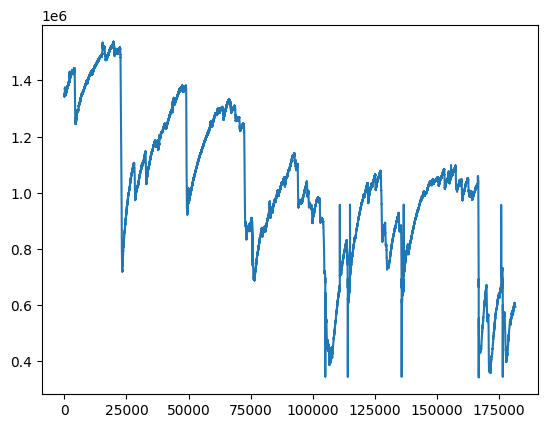

In [42]:
import matplotlib.pyplot as plt
plt.plot(data['joined_data'][0][16][384:,16])
data['joined_data'][0][3][384:,16].shape

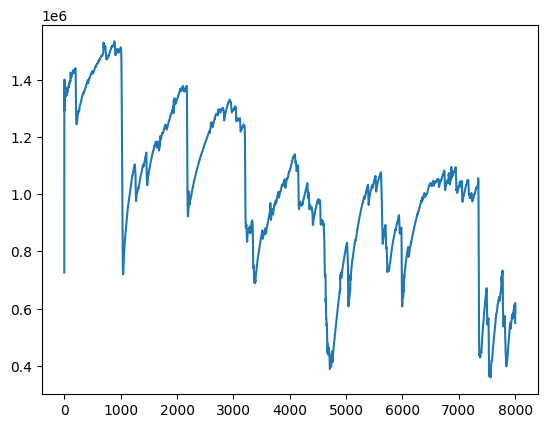

In [43]:
import scipy.io
y1 = scipy.signal.resample(data['joined_data'][0][16][:,16], 8000)
plt.plot(y1)


In [1]:
import glob
import os
filelist = glob.glob('AMIGOS/*.mat')
print(filelist)
subjectnames = [fr[25:28] for fr in filelist]
print(subjectnames)

['AMIGOS/Data_Preprocessed_P33.mat', 'AMIGOS/Data_Preprocessed_P30.mat', 'AMIGOS/Data_Preprocessed_P13.mat', 'AMIGOS/Data_Preprocessed_P26.mat', 'AMIGOS/Data_Preprocessed_P37.mat', 'AMIGOS/Data_Preprocessed_P31.mat', 'AMIGOS/Data_Preprocessed_P10.mat', 'AMIGOS/Data_Preprocessed_P09.mat', 'AMIGOS/Data_Preprocessed_P05.mat', 'AMIGOS/Data_Preprocessed_P40.mat', 'AMIGOS/Data_Preprocessed_P35.mat', 'AMIGOS/Data_Preprocessed_P32.mat', 'AMIGOS/Data_Preprocessed_P22.mat', 'AMIGOS/Data_Preprocessed_P23.mat', 'AMIGOS/Data_Preprocessed_P17.mat', 'AMIGOS/Data_Preprocessed_P04.mat', 'AMIGOS/Data_Preprocessed_P12.mat', 'AMIGOS/Data_Preprocessed_P34.mat', 'AMIGOS/Data_Preprocessed_P29.mat', 'AMIGOS/Data_Preprocessed_P15.mat', 'AMIGOS/Data_Preprocessed_P02.mat', 'AMIGOS/Data_Preprocessed_P25.mat', 'AMIGOS/Data_Preprocessed_P18.mat', 'AMIGOS/Data_Preprocessed_P36.mat', 'AMIGOS/Data_Preprocessed_P16.mat', 'AMIGOS/Data_Preprocessed_P28.mat', 'AMIGOS/Data_Preprocessed_P03.mat', 'AMIGOS/Data_Preprocessed_P

In [2]:
import scipy.io
import numpy as np
data_am = {}
skiplist = ['P28','P08','P24','P32']
newsubjectname = []
for sname in subjectnames:
    if sname in skiplist:
      continue
    newsubjectname.append(sname)
    dname = "AMIGOS/Data_Preprocessed_"+sname+".mat"
    x = scipy.io.loadmat(dname)
    print(sname)
    samples = []
    samples_labels = []
    for i in range(x['joined_data'].shape[1]):
        x1 = x['joined_data'][0][i]
        x2 = scipy.signal.resample(x1[384:,16], 8064)
        y1 = x['labels_selfassessment'][0][i][0][0:2]
        samples.append(x2)
        samples_labels.append(y1)
    samples_stack = np.vstack(samples)
    samples_labels_stack = np.vstack(samples_labels)
    data_am[sname] = [samples_stack,samples_labels_stack]

print(data_am.keys())

P33
P30
P13
P26
P37
P31
P10
P09
P05
P40
P35
P22
P23
P17
P04
P12
P34
P29
P15
P02
P25
P18
P36
P16
P03
P38
P39
P27
P01
P19
P06
P11
P21
P07
P14
P20
dict_keys(['P33', 'P30', 'P13', 'P26', 'P37', 'P31', 'P10', 'P09', 'P05', 'P40', 'P35', 'P22', 'P23', 'P17', 'P04', 'P12', 'P34', 'P29', 'P15', 'P02', 'P25', 'P18', 'P36', 'P16', 'P03', 'P38', 'P39', 'P27', 'P01', 'P19', 'P06', 'P11', 'P21', 'P07', 'P14', 'P20'])


In [8]:
data_am['P01'][0]

array([3237180.31474926, 3110649.65303398, 3179062.7496687 , ...,
       3514282.08715568, 3478618.13315719, 3540966.49534216])

In [3]:
import numpy as np
import matplotlib.pyplot as plt
data_cam = {}
for k,v in data_am.items():
    y = v[0]
    ym = np.mean(y,axis=-1).reshape(20,1)
    ystd = np.std(y,axis=-1).reshape(20,1)
    z = (y-ym)/ystd
    #print(z.shape)
    data_cam[k] = [z,v[1]]

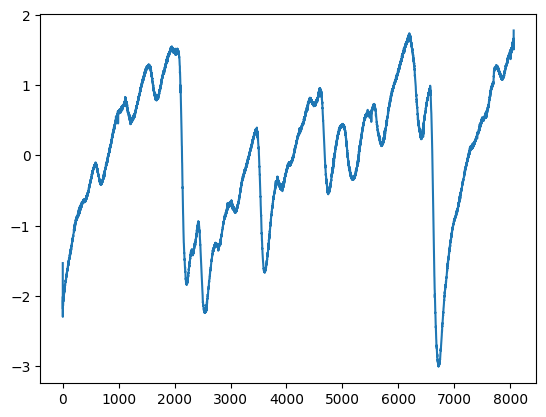

In [4]:
plt.plot(data_cam['P01'][0][0])

In [5]:
import torch
data_c1d = {}
BLOCK_SIZE=640
BLOCK_STRIDE=60
for k,v in data_cam.items():
    datablocki = []
    v1 = v[0]
    v1 = v1[:,np.newaxis,:]
    #print(v1.shape)
    data_c1d[k] = torch.tensor(v1)
print(data_c1d['P01'][0].shape)

torch.Size([1, 8064])


In [5]:
data_c2 = {}
for k,v in data_cam.items():
    y = v[1]
    x_label = np.zeros((y.shape[0]),dtype='float64')
    for i in range(y.shape[0]):
        if (y[i][0] > 5):
            x_label[i] = 1
        else:
            x_label[i] = 0

    x_l = x_label
    x_l = x_l.reshape(-1,1)
    x_l = torch.tensor(x_l)
    data_c2[k] = x_l

In [24]:
data_c2['P02']

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.]], dtype=torch.float64)

In [6]:
data_c2 = {}
maxnum = 3
for k,v in data_cam.items():
    y = v[1]
    x_label = np.zeros((y.shape[0]),dtype='int32')
    for i in range(y.shape[0]):
        if (y[i][1] > 5 and y[i][0] > 5):
            x_label[i] = 3
        elif (y[i][1] <= 5 and y[i][0] > 5):
            x_label[i] = 2
        elif (y[i][1] > 5 and y[i][0] <= 5):
            x_label[i] = 1
        elif (y[i][1] <= 5 and y[i][0] <= 5):
            x_label[i] = 0

    x_l = np.zeros((x_label.size, maxnum+1))
    x_l[np.arange(x_label.size), x_label] = 1

    x_l = torch.tensor(x_l)
    data_c2[k] = x_l


In [18]:
data_c2['P01'].shape

torch.Size([20, 4])

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#from torchinfo import Summary
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1=nn.Conv1d(1, 34, 10,stride=1)
        self.mp1=nn.MaxPool1d(2)
        self.norm1 = nn.BatchNorm1d(34)
        self.d = nn.Dropout(p=0.63)
        self.c2=nn.Conv1d(34, 30, 10,stride=1)
        self.mp2=nn.MaxPool1d(2)
        self.c3=nn.Conv1d(30, 10, 10,stride=1)
        self.norm3 = nn.BatchNorm1d(10)
        self.mp3=nn.MaxPool1d(2)
        self.ft = nn.Flatten()

        self.n1 = nn.Linear(20070,110)
        #self.n1 = nn.Linear(19590,110)
        self.normfc1=nn.BatchNorm1d(110)
        self.d = nn.Dropout(p=0.63)
        #self.d = nn.Dropout()
        self.n2 = nn.Linear(110,100)
        self.n3 = nn.Linear(100,4)


    def forward(self, x):
        x = self.d(self.norm1(F.tanh(self.c1(x))))
        #x=F.tanh(self.c1(x))
        x = self.mp2(F.tanh(self.c2(x)))
        #print(x.shape)
        x = self.mp3(F.tanh(self.c3(x)))

        #print(x.shape)
        x = self.ft(x)
        #print(x.shape)
        x = F.tanh(self.n1(x))
        x=self.normfc1(x)
        #x=self.norm3(x)
        x=self.d(x)

        #x = F.softmax(self.n2(x),dim=-1)
        x = F.tanh(self.n2(x))
        #x = F.sigmoid(self.n3(x))

        x = (self.n3(x))
        #print(x.shape)
        return x


criterion = nn.CrossEntropyLoss()
#criterion = nn.BCELoss()



In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
file_list_num = np.arange(len(newsubjectname))
kf = KFold(n_splits=12)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
modellist = []
modelid = 1
#file_list_num
#for i, (train_index, test_index) in enumerate(kf.split(file_list_num)):
#for train_index in file_list_num:
train_index = file_list_num
print(f"Fold {i}:")
print(f"  Train: index={train_index}")
#print(f"  Test:  index={test_index}")
net = Net()
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.000001)
epochs = 60
batch_sz = 20
train_loss_epoch = []
val_loss_epoch = []
for epoch in range(epochs):
  train_loss = []
  for tr in train_index:
    v = data_c1d[newsubjectname[tr]]
    l = data_c2[newsubjectname[tr]]
    #print(v[0].shape)
    net.train()
    for i in range(0,len(v),batch_sz):
      #print(v[i].shape)
      #for j in range(0,v[i].shape[0],batch_sz):
      #print(newsubjectname[tr])
      optimizer.zero_grad()
      outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
      #print("Expout {}",outputs.shape)
      #print("Actual {}",l[i:i+batch_sz].shape)
      #print(l[i].shape)
      loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
      loss.backward()
      train_loss.append(loss)
      optimizer.step()
  print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {loss.item()}')
  train_loss_epoch.append(torch.stack(train_loss).mean().cpu().detach().numpy())

  '''
  for tr in test_index:
      net.eval()
      v = data_c1d[newsubjectname[tr]]
      l = data_c2[newsubjectname[tr]]
      net.eval()
      with torch.no_grad():
          for i in range(0,len(v),batch_sz):
            #print(v[i].shape)
            #for j in range(0,v[i].shape[0],batch_sz):
            optimizer.zero_grad()
            outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
            #print(outputs.shape)
            #print(l[i].shape)
            #outputs1 = torch.softmax(outputs,dim=-1)
            loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
            val_loss.append(loss)
            #loss.backward()
            actualoutput.append(torch.round(outputs.cpu()))
            expectedoutput.append(l[i:i+batch_sz])
            #actualoutput.append(torch.argmax(torch.softmax(outputs.cpu(),dim=1),dim=1))
            #expectedoutput.append(torch.argmax(l[i:i+batch_sz],dim=1).numpy())
  val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
  val_loss_epoch.append(val_loss_mean)
  expectedoutput = np.concatenate( expectedoutput, axis=0 )
  actualoutput = np.concatenate( actualoutput, axis=0 )
  print(expectedoutput.shape)
  print(actualoutput.shape)
  print(classification_report(expectedoutput,actualoutput))
  print(confusion_matrix(expectedoutput,actualoutput))
  print(f'Validation Loss for {subjectnames[tr]} = {val_loss_mean}')
  #break
  '''
#plt.figure(figsize=(10,7))
#print(len(train_loss_epoch))
#plt.plot(np.arange(epochs),train_loss_epoch,label='Train')
#plt.plot(np.arange(epochs),val_loss_epoch,label='Validation')
#plt.legend()
#path = "Model"+str(modelid) +".pt"
#path = "ModelAMIGOS_Aro.pt"
#modelid = modelid+1
#print(path)
#torch.save(net.state_dict(), path)

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


/tmp/ipykernel_203/3472248682.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 1/60, Train Loss: 0.6609741449356079
Epoch 2/60, Train Loss: 0.6968510746955872
Epoch 3/60, Train Loss: 0.7063091397285461
Epoch 4/60, Train Loss: 0.7129724025726318
Epoch 5/60, Train Loss: 0.6755002737045288
Epoch 6/60, Train Loss: 0.677463948726654
Epoch 7/60, Train Loss: 0.7001715302467346
Epoch 8/60, Train Loss: 0.641160249710083
Epoch 9/60, Train Loss: 0.6524507403373718
Epoch 10/60, Train Loss: 0.6981868147850037
Epoch 11/60, Train Loss: 0.7125951051712036
Epoch 12/60, Train Loss: 0.6761418581008911
Epoch 13/60, Train Loss: 0.6650707125663757
Epoch 14/60, Train Loss: 0.6498364806175232
Epoch 15/60, Train Loss: 0.6750850081443787
Epoch 16/60, Train Loss: 0.7362504005432129
Epoch 17/60, Train Loss: 0.6782377362251282
Epoch 18/60, Train Loss: 0.6005708575248718
Epoch 19/60, Train Loss: 0.6484631896018982
Epoch 20/60, Train Loss: 0.6615355610847473
Epoch 21/60, Train Loss: 0.7476146817207336
Epoch 22/60, Train Loss: 0.6450007557868958
Epoch 23/60, Train Loss: 0.6990272998809814

In [27]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
batch_sz = 20
file_list_num = np.arange(len(subjectnames))
modelid = 1
netValence = Net()
valmodelname = "Valence_Model4"+".pt"
netValence.load_state_dict(torch.load(valmodelname))
netValence.to(device)
netArousal = Net()
aromodelname = "Model5"+".pt"
netArousal.load_state_dict(torch.load(aromodelname))
netArousal.to(device)
for i in range(0,32,4):

    #optimizer = optim.Adam(net.parameters(), lr=0.000001)
    expectedoutput = []
    actualoutput = []
    for tr in file_list_num[i:i+4]:
        #net.eval()
        v = data_c1d[subjectnames[tr]]
        l = data_c3[subjectnames[tr]]
        netValence.eval()
        netArousal.eval()
        with torch.no_grad():
            for i in range(0,len(v),batch_sz):
              #print(v[i].shape)
              #for j in range(0,v[i].shape[0],batch_sz):
              #optimizer.zero_grad()
              outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
              outputs_val1 = torch.round(outputs_val)
              outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
              outputs_aro1 = torch.round(outputs_aro)

              #print(outputs_val1)
              for j in range(0,outputs_aro1.shape[0]):
                res = 0
                if (outputs_val1[j][0] >= 1 and outputs_aro1[j][0] >= 1):
                    res = 4
                elif (outputs_val1[j][0] < 1 and outputs_aro1[j][0] >= 1):
                    res = 3
                elif (outputs_val1[j][0] >= 1 and outputs_aro1[j][0] < 1):
                    res = 2
                elif (outputs_val1[j][0] < 1 and outputs_aro1[j][0] < 1):
                    res = 1
                actualoutput.append(res)
              #loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
              #val_loss.append(loss)
              #loss.backward()
              #print(outputs.shape)
              #print(l[i:i+batch_sz])
              expectedoutput.append(l[i:i+batch_sz])
              #actualoutput.append(actualoutput)
      #val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
      #val_loss_epoch.append(val_loss_mean)
    expectedoutput = np.concatenate( expectedoutput, axis=0 )
      #actualoutput = np.concatenate( actualoutput, axis=0 )
      #print(actualoutput)
    #print(expectedoutput)
    #print(actualoutput)
    print(classification_report(expectedoutput,actualoutput))
      #print(f'Validation Loss for {subjectnames[tr]} = {val_loss_mean}')
      #break

<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.39      0.22      0.28        41
           2       0.56      0.12      0.20        42
           3       0.24      0.52      0.33        27
           4       0.36      0.50      0.42        50

    accuracy                           0.33       160
   macro avg       0.39      0.34      0.31       160
weighted avg       0.40      0.33      0.31       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.50      0.17      0.25        42
           2       1.00      0.10      0.18        30
           3       0.34      0.83      0.48        41
           4       0.40      0.36      0.38        47

    accuracy                           0.38       160
   macro avg       0.56      0.36      0.32       160
weighted avg       0.52      0.38      0.33       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.21      0.19      0.20        31
           2       0.57      0.12      0.20        34
           3       0.29      0.53      0.37        43
           4       0.48      0.40      0.44        52

    accuracy                           0.34       160
   macro avg       0.39      0.31      0.30       160
weighted avg       0.39      0.34      0.32       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.36      0.12      0.19        32
           2       0.67      0.05      0.10        39
           3       0.30      0.67      0.42        39
           4       0.52      0.62      0.56        50

    accuracy                           0.39       160
   macro avg       0.46      0.37      0.32       160
weighted avg       0.47      0.39      0.34       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.44      0.10      0.16        42
           2       0.33      0.07      0.12        28
           3       0.21      0.77      0.33        26
           4       0.48      0.36      0.41        64

    accuracy                           0.31       160
   macro avg       0.37      0.32      0.25       160
weighted avg       0.40      0.31      0.28       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.56      0.18      0.27        28
           2       0.00      0.00      0.00        22
           3       0.31      0.71      0.43        48
           4       0.55      0.35      0.43        62

    accuracy                           0.38       160
   macro avg       0.35      0.31      0.28       160
weighted avg       0.40      0.38      0.34       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/

              precision    recall  f1-score   support

           1       0.17      0.03      0.05        33
           2       0.00      0.00      0.00        37
           3       0.27      0.76      0.39        41
           4       0.37      0.29      0.32        49

    accuracy                           0.29       160
   macro avg       0.20      0.27      0.19       160
weighted avg       0.22      0.29      0.21       160

              precision    recall  f1-score   support

           1       0.26      0.20      0.23        25
           2       1.00      0.14      0.24        37
           3       0.20      0.55      0.29        33
           4       0.50      0.34      0.40        65

    accuracy                           0.31       160
   macro avg       0.49      0.30      0.29       160
weighted avg       0.52      0.31      0.31       160



In [ ]:
rm -rf Model*.pt

In [28]:
data_c3 = {}
for k,v in data_c.items():
    y = data_c[k][1]
    x_label = np.zeros((y.shape[0]),dtype='int8')
    for i in range(y.shape[0]):
        if (y[i][0] > 5 and y[i][1] > 5):
            x_label[i] = 4
        elif (y[i][0] <= 5 and y[i][1] > 5):
            x_label[i] = 3
        elif (y[i][0] > 5 and y[i][1] <= 5):
            x_label[i] = 2
        elif (y[i][0] <= 5 and y[i][1] <= 5):
            x_label[i] = 1
    #x_l = np.zeros((x_label.size, x_label.max()+1))
    #x_l[np.arange(x_label.size), x_label] = 1
    #
    #print(x_l.shape)
    #x_l = x_l.reshape(-1,1,4)
    #x_l = np.repeat(x_l, 117, axis=1)
    #print(x_l.shape)
    x_l = torch.tensor(x_label)
    data_c3[k] = x_l
    #print(data_c3)

In [8]:
import glob
import os
filelistd = glob.glob('DEAP/*.dat')
print(filelistd)
subjectnamesd = [fr[5:8] for fr in filelistd]
print(subjectnamesd)

['DEAP/s21.dat', 'DEAP/s25.dat', 'DEAP/s07.dat', 'DEAP/s22.dat', 'DEAP/s32.dat', 'DEAP/s10.dat', 'DEAP/s04.dat', 'DEAP/s23.dat', 'DEAP/s30.dat', 'DEAP/s06.dat', 'DEAP/s31.dat', 'DEAP/s16.dat', 'DEAP/s15.dat', 'DEAP/s08.dat', 'DEAP/s28.dat', 'DEAP/s17.dat', 'DEAP/s26.dat', 'DEAP/s02.dat', 'DEAP/s19.dat', 'DEAP/s18.dat', 'DEAP/s03.dat', 'DEAP/s29.dat', 'DEAP/s24.dat', 'DEAP/s05.dat', 'DEAP/s14.dat', 'DEAP/s12.dat', 'DEAP/s11.dat', 'DEAP/s27.dat', 'DEAP/s20.dat', 'DEAP/s09.dat', 'DEAP/s13.dat', 'DEAP/s01.dat']
['s21', 's25', 's07', 's22', 's32', 's10', 's04', 's23', 's30', 's06', 's31', 's16', 's15', 's08', 's28', 's17', 's26', 's02', 's19', 's18', 's03', 's29', 's24', 's05', 's14', 's12', 's11', 's27', 's20', 's09', 's13', 's01']


In [9]:
import pickle
datad = {}
for sname in subjectnamesd:
    dname = "DEAP/"+sname+".dat"
    f = open(dname, 'rb')
    x = pickle.load(f, encoding='latin1')
    datad[sname] = x
print(datad.keys())

dict_keys(['s21', 's25', 's07', 's22', 's32', 's10', 's04', 's23', 's30', 's06', 's31', 's16', 's15', 's08', 's28', 's17', 's26', 's02', 's19', 's18', 's03', 's29', 's24', 's05', 's14', 's12', 's11', 's27', 's20', 's09', 's13', 's01'])


In [10]:
import numpy as np
data_de = {}
for k,v in datad.items():
    y = datad[k]['data'][:,36,:]
    ym = np.mean(y,axis=-1).reshape(40,1)
    ystd = np.std(y,axis=-1).reshape(40,1)
    z = (y-ym)/ystd
    data_de[k] = [z,datad[k]['labels']]

In [11]:
import torch
data_de1 = {}
for k,v in data_de.items():
    datablocki = []
    v1=np.vstack(v[0])
    v1 = v1[:,np.newaxis,:]
    data_de1[k] = torch.tensor(v1)
print(data_de1['s01'][0].shape)

torch.Size([1, 8064])


In [12]:
data_del = {}
ximax = 3
for k,v in data_de.items():
    y = data_de[k][1]
    x_label = np.zeros((y.shape[0]),dtype='int64')
    for i in range(y.shape[0]):
        if (y[i][0] > 5 and y[i][1] > 5):
            x_label[i] = 3
        elif (y[i][0] <= 5 and y[i][1] > 5):
            x_label[i] = 2
        elif (y[i][0] > 5 and y[i][1] <= 5):
            x_label[i] = 1
        elif (y[i][0] <= 5 and y[i][1] <= 5):
            x_label[i] = 0
    x_l = np.zeros((x_label.size, ximax+1))
    x_l[np.arange(x_label.size), x_label] = 1
    #x_l = x_label
    #
    #print(x_l.shape)
    x_l = x_l.reshape(-1,4)

    x_l = torch.tensor(x_l)
    data_del[k] = x_l

In [14]:
data_del['s01'].shape

torch.Size([40, 4])

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
file_list_numd = np.arange(len(subjectnamesd))
net = Net()
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.000001)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
expectedoutputdeap = []
actualoutputdeap = []
val_loss = []
expectedoutput = []
actualoutput = []
test_index = file_list_numd
print(f"Fold {i}:")
print(f"  Train: index={test_index}")
#print(f"  Test:  index={test_index}")
#net = Net()
#net.to(device)
#optimizer = optim.Adam(net.parameters(), lr=0.000001)
#epochs = 60
batch_sz = 20
train_loss_epoch = []
val_loss_epoch = []

for tr in test_index:
    net.eval()
    v = data_de1[subjectnamesd[tr]]
    l = data_del[subjectnamesd[tr]]
    net.eval()
    with torch.no_grad():
        for i in range(0,len(v),batch_sz):
          #print(v[i].shape)
          #for j in range(0,v[i].shape[0],batch_sz):
          optimizer.zero_grad()
          outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
          #print(outputs.shape)
          #print(l[i:i+batch_sz].shape)
          loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
          val_loss.append(loss)
          actualoutputdeap.append(torch.round(outputs.cpu()))
          expectedoutputdeap.append(l[i:i+batch_sz])
          #actualoutput.append(torch.argmax(torch.softmax(outputs.cpu(),dim=1),dim=1))
          #expectedoutput.append(torch.argmax(l[i:i+batch_sz],dim=1).numpy())
val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
val_loss_epoch.append(val_loss_mean)
expectedoutputdeap = np.concatenate( expectedoutputdeap, axis=0 )
actualoutputdeap = np.concatenate( actualoutputdeap, axis=0 )
#print(expectedoutput.shape)
#print(actualoutput.shape)
print(classification_report(expectedoutputdeap,actualoutputdeap))
print(confusion_matrix(expectedoutputdeap,actualoutputdeap))
print(f'Validation Loss for {subjectnamesd[tr]} = {val_loss_mean}')
#break

#plt.figure(figsize=(10,7))
#print(len(train_loss_epoch))
#plt.plot(np.arange(epochs),train_loss_epoch,label='Train')
#plt.plot(np.arange(epochs),val_loss_epoch,label='Validation')
#plt.legend()
#path = "Model"+str(modelid) +".pt"
#path = "ModelAMIGOS_Aro.pt"
#modelid = modelid+1
#print(path)
#torch.save(net.state_dict(), path)

Fold 20:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


/tmp/ipykernel_410/3061022090.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


              precision    recall  f1-score   support

         0.0       0.45      1.00      0.62       572
         1.0       0.00      0.00      0.00       708

    accuracy                           0.45      1280
   macro avg       0.22      0.50      0.31      1280
weighted avg       0.20      0.45      0.28      1280

[[572   0]
 [708   0]]
Validation Loss for s01 = 0.6970333456993103


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 20:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 1/100, Train Loss: 1.5232149362564087


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.08      0.01      0.02        74
           1       0.19      0.32      0.23        73
           2       0.22      0.22      0.22       106
           3       0.39      0.41      0.40       147

    accuracy                           0.27       400
   macro avg       0.22      0.24      0.22       400
weighted avg       0.25      0.27      0.25       400

[[ 1 28 17 28]
 [ 3 23 23 24]
 [ 3 35 23 45]
 [ 5 38 43 61]]
Validation Loss for s21 = 1.366054892539978


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 2/100, Train Loss: 1.360924482345581


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.13      0.14      0.13        74
           1       0.16      0.32      0.21        73
           2       0.23      0.22      0.22       106
           3       0.45      0.24      0.31       147

    accuracy                           0.23       400
   macro avg       0.24      0.23      0.22       400
weighted avg       0.28      0.23      0.24       400

[[10 35 16 13]
 [13 23 22 15]
 [21 47 23 15]
 [31 41 40 35]]
Validation Loss for s21 = 1.3570306301116943


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 3/100, Train Loss: 1.378825068473816


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.45      0.26        74
           1       0.21      0.19      0.20        73
           2       0.21      0.18      0.19       106
           3       0.48      0.21      0.29       147

    accuracy                           0.24       400
   macro avg       0.27      0.26      0.24       400
weighted avg       0.31      0.24      0.24       400

[[33 15 15 11]
 [26 14 22 11]
 [58 18 19 11]
 [60 20 36 31]]
Validation Loss for s21 = 1.3509998321533203


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 4/100, Train Loss: 1.3844245672225952


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.50      0.27        74
           1       0.20      0.16      0.18        73
           2       0.21      0.18      0.19       106
           3       0.47      0.18      0.26       147

    accuracy                           0.23       400
   macro avg       0.27      0.26      0.23       400
weighted avg       0.30      0.23      0.23       400

[[37 13 14 10]
 [29 12 20 12]
 [66 14 19  7]
 [65 20 36 26]]
Validation Loss for s21 = 1.3501675128936768


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 5/100, Train Loss: 1.3959131240844727


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.50      0.27        74
           1       0.18      0.14      0.15        73
           2       0.20      0.15      0.17       106
           3       0.45      0.19      0.27       147

    accuracy                           0.23       400
   macro avg       0.25      0.24      0.22       400
weighted avg       0.29      0.23      0.22       400

[[37 13 14 10]
 [32 10 17 14]
 [66 14 16 10]
 [66 20 33 28]]
Validation Loss for s21 = 1.342175006866455


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 6/100, Train Loss: 1.45297372341156


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.50      0.27        74
           1       0.16      0.14      0.15        73
           2       0.22      0.15      0.18       106
           3       0.50      0.20      0.29       147

    accuracy                           0.23       400
   macro avg       0.27      0.25      0.22       400
weighted avg       0.30      0.23      0.23       400

[[37 15 12 10]
 [34 10 17 12]
 [68 14 16  8]
 [66 24 27 30]]
Validation Loss for s21 = 1.3465596437454224


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 7/100, Train Loss: 1.3328428268432617


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.50      0.26        74
           1       0.18      0.15      0.16        73
           2       0.20      0.13      0.16       106
           3       0.48      0.20      0.28       147

    accuracy                           0.23       400
   macro avg       0.26      0.25      0.22       400
weighted avg       0.29      0.23      0.22       400

[[37 15 11 11]
 [36 11 14 12]
 [69 14 14  9]
 [66 21 31 29]]
Validation Loss for s21 = 1.350050926208496


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 8/100, Train Loss: 1.3837321996688843


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.18      0.50      0.27        74
           1       0.18      0.16      0.17        73
           2       0.19      0.11      0.14       106
           3       0.43      0.19      0.26       147

    accuracy                           0.22       400
   macro avg       0.25      0.24      0.21       400
weighted avg       0.27      0.22      0.22       400

[[37 15  9 13]
 [34 12 13 14]
 [68 16 12 10]
 [66 23 30 28]]
Validation Loss for s21 = 1.34157133102417
Epoch 9/100, Train Loss: 1.3168014287948608


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.53      0.27        74
           1       0.19      0.16      0.18        73
           2       0.17      0.08      0.11       106
           3       0.47      0.23      0.31       147

    accuracy                           0.23       400
   macro avg       0.25      0.25      0.22       400
weighted avg       0.29      0.23      0.23       400

[[39 13  9 13]
 [35 12 12 14]
 [69 16  9 12]
 [68 23 22 34]]
Validation Loss for s21 = 1.3397036790847778


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 10/100, Train Loss: 1.2848080396652222


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.53      0.28        74
           1       0.18      0.16      0.17        73
           2       0.16      0.09      0.12       106
           3       0.43      0.18      0.26       147

    accuracy                           0.22       400
   macro avg       0.24      0.24      0.21       400
weighted avg       0.27      0.22      0.21       400

[[39 13 10 12]
 [34 12 13 14]
 [68 18 10 10]
 [68 24 28 27]]
Validation Loss for s21 = 1.3390028476715088


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 11/100, Train Loss: 1.437317132949829


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.50      0.26        74
           1       0.19      0.16      0.18        73
           2       0.16      0.08      0.10       106
           3       0.45      0.24      0.31       147

    accuracy                           0.23       400
   macro avg       0.24      0.24      0.21       400
weighted avg       0.27      0.23      0.22       400

[[37 12 10 15]
 [34 12 12 15]
 [69 16  8 13]
 [67 24 21 35]]
Validation Loss for s21 = 1.3319637775421143


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 12/100, Train Loss: 1.3874033689498901


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.50      0.26        74
           1       0.19      0.16      0.18        73
           2       0.16      0.09      0.12       106
           3       0.41      0.19      0.26       147

    accuracy                           0.22       400
   macro avg       0.24      0.24      0.20       400
weighted avg       0.26      0.22      0.21       400

[[37 12 11 14]
 [34 12 12 15]
 [69 16 10 11]
 [67 23 29 28]]
Validation Loss for s21 = 1.334141492843628


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 13/100, Train Loss: 1.390348196029663


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.50      0.27        74
           1       0.18      0.18      0.18        73
           2       0.17      0.09      0.12       106
           3       0.43      0.19      0.26       147

    accuracy                           0.22       400
   macro avg       0.24      0.24      0.21       400
weighted avg       0.27      0.22      0.21       400

[[37 14 10 13]
 [34 13 12 14]
 [68 18 10 10]
 [65 26 28 28]]
Validation Loss for s21 = 1.338241457939148


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 14/100, Train Loss: 1.3310455083847046


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.19      0.55      0.28        74
           1       0.18      0.14      0.15        73
           2       0.17      0.10      0.13       106
           3       0.43      0.18      0.26       147

    accuracy                           0.22       400
   macro avg       0.24      0.24      0.21       400
weighted avg       0.27      0.22      0.21       400

[[41 10 10 13]
 [37 10 12 14]
 [70 16 11  9]
 [69 21 30 27]]
Validation Loss for s21 = 1.3335562944412231
Epoch 15/100, Train Loss: 1.4889132976531982


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.55      0.28        74
           1       0.18      0.14      0.16        73
           2       0.16      0.08      0.11       106
           3       0.47      0.22      0.30       147

    accuracy                           0.23       400
   macro avg       0.25      0.25      0.21       400
weighted avg       0.28      0.23      0.22       400

[[41 11  9 13]
 [37 10 12 14]
 [72 15  9 10]
 [69 19 26 33]]
Validation Loss for s21 = 1.333701252937317


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 16/100, Train Loss: 1.4178032875061035


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.55      0.28        74
           1       0.20      0.15      0.17        73
           2       0.18      0.10      0.13       106
           3       0.48      0.22      0.30       147

    accuracy                           0.24       400
   macro avg       0.26      0.26      0.22       400
weighted avg       0.30      0.24      0.23       400

[[41 10 10 13]
 [37 11 12 13]
 [72 15 11  8]
 [68 20 27 32]]
Validation Loss for s21 = 1.3328561782836914


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 17/100, Train Loss: 1.393535852432251


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.19      0.55      0.28        74
           1       0.18      0.15      0.17        73
           2       0.17      0.10      0.13       106
           3       0.44      0.18      0.25       147

    accuracy                           0.22       400
   macro avg       0.25      0.25      0.21       400
weighted avg       0.27      0.22      0.21       400

[[41 11 10 12]
 [36 11 13 13]
 [71 16 11  8]
 [67 22 32 26]]
Validation Loss for s21 = 1.3341606855392456
Epoch 18/100, Train Loss: 1.3798311948776245


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.19      0.54      0.28        74
           1       0.18      0.15      0.16        73
           2       0.16      0.10      0.13       106
           3       0.44      0.18      0.25       147

    accuracy                           0.22       400
   macro avg       0.24      0.24      0.21       400
weighted avg       0.27      0.22      0.21       400

[[40 11 11 12]
 [36 11 13 13]
 [71 16 11  8]
 [66 23 32 26]]
Validation Loss for s21 = 1.3303396701812744
Epoch 19/100, Train Loss: 1.3317105770111084


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.55      0.28        74
           1       0.20      0.16      0.18        73
           2       0.16      0.10      0.13       106
           3       0.46      0.18      0.25       147

    accuracy                           0.23       400
   macro avg       0.25      0.25      0.21       400
weighted avg       0.28      0.23      0.21       400

[[41 11 11 11]
 [37 12 12 12]
 [71 16 11  8]
 [67 21 33 26]]
Validation Loss for s21 = 1.3414312601089478


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 20/100, Train Loss: 1.391959309577942


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.54      0.28        74
           1       0.19      0.16      0.18        73
           2       0.17      0.10      0.13       106
           3       0.45      0.20      0.27       147

    accuracy                           0.23       400
   macro avg       0.25      0.25      0.22       400
weighted avg       0.28      0.23      0.22       400

[[40 12  9 13]
 [36 12 12 13]
 [70 16 11  9]
 [65 22 31 29]]
Validation Loss for s21 = 1.3363065719604492


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 21/100, Train Loss: 1.2739685773849487


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.54      0.28        74
           1       0.18      0.16      0.17        73
           2       0.19      0.10      0.13       106
           3       0.43      0.20      0.28       147

    accuracy                           0.23       400
   macro avg       0.25      0.25      0.22       400
weighted avg       0.28      0.23      0.22       400

[[40 12  7 15]
 [35 12 11 15]
 [68 18 11  9]
 [64 24 29 30]]
Validation Loss for s21 = 1.33707857131958


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 22/100, Train Loss: 1.444475769996643


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.54      0.28        74
           1       0.18      0.16      0.17        73
           2       0.18      0.10      0.13       106
           3       0.43      0.19      0.26       147

    accuracy                           0.23       400
   macro avg       0.25      0.25      0.21       400
weighted avg       0.27      0.23      0.22       400

[[40 11  9 14]
 [36 12 11 14]
 [68 18 11  9]
 [63 25 31 28]]
Validation Loss for s21 = 1.3395650386810303


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 23/100, Train Loss: 1.4776731729507446


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.55      0.28        74
           1       0.20      0.16      0.18        73
           2       0.20      0.11      0.14       106
           3       0.44      0.19      0.27       147

    accuracy                           0.23       400
   macro avg       0.26      0.26      0.22       400
weighted avg       0.29      0.23      0.22       400

[[41 10  9 14]
 [37 12 10 14]
 [71 16 12  7]
 [68 21 30 28]]
Validation Loss for s21 = 1.3384349346160889


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 24/100, Train Loss: 1.3041068315505981


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.57      0.29        74
           1       0.21      0.16      0.18        73
           2       0.18      0.10      0.13       106
           3       0.45      0.20      0.27       147

    accuracy                           0.23       400
   macro avg       0.26      0.26      0.22       400
weighted avg       0.29      0.23      0.22       400

[[42 10  9 13]
 [37 12 10 14]
 [71 16 11  8]
 [69 19 30 29]]
Validation Loss for s21 = 1.3373844623565674


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 25/100, Train Loss: 1.3178534507751465


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.55      0.29        74
           1       0.18      0.15      0.17        73
           2       0.17      0.10      0.13       106
           3       0.43      0.18      0.26       147

    accuracy                           0.23       400
   macro avg       0.24      0.25      0.21       400
weighted avg       0.27      0.23      0.21       400

[[41 10  9 14]
 [37 11 11 14]
 [70 17 11  8]
 [65 22 33 27]]
Validation Loss for s21 = 1.3378249406814575


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 26/100, Train Loss: 1.4470902681350708


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.55      0.29        74
           1       0.19      0.16      0.18        73
           2       0.21      0.12      0.16       106
           3       0.45      0.20      0.28       147

    accuracy                           0.24       400
   macro avg       0.26      0.26      0.23       400
weighted avg       0.29      0.24      0.23       400

[[41 10  9 14]
 [37 12 10 14]
 [69 16 13  8]
 [64 24 29 30]]
Validation Loss for s21 = 1.337867021560669


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 27/100, Train Loss: 1.3557045459747314


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.20      0.57      0.30        74
           1       0.21      0.19      0.20        73
           2       0.21      0.13      0.16       106
           3       0.48      0.20      0.28       147

    accuracy                           0.25       400
   macro avg       0.28      0.27      0.24       400
weighted avg       0.31      0.25      0.24       400

[[42 10 10 12]
 [35 14 12 12]
 [66 19 14  7]
 [63 24 31 29]]
Validation Loss for s21 = 1.3375166654586792


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 28/100, Train Loss: 1.427163004875183


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.20      0.57      0.30        74
           1       0.21      0.19      0.20        73
           2       0.20      0.12      0.15       106
           3       0.47      0.20      0.28       147

    accuracy                           0.24       400
   macro avg       0.27      0.27      0.23       400
weighted avg       0.30      0.24      0.23       400

[[42 10 10 12]
 [35 14 11 13]
 [66 19 13  8]
 [63 24 31 29]]
Validation Loss for s21 = 1.336465835571289


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 29/100, Train Loss: 1.4607257843017578


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.21      0.57      0.30        74
           1       0.21      0.21      0.21        73
           2       0.20      0.12      0.15       106
           3       0.48      0.20      0.29       147

    accuracy                           0.25       400
   macro avg       0.28      0.27      0.24       400
weighted avg       0.31      0.25      0.24       400

[[42 11 10 11]
 [33 15 12 13]
 [66 19 13  8]
 [62 25 30 30]]
Validation Loss for s21 = 1.3372416496276855


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 30/100, Train Loss: 1.358583927154541


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.20      0.57      0.29        74
           1       0.22      0.19      0.21        73
           2       0.20      0.11      0.14       106
           3       0.46      0.20      0.28       147

    accuracy                           0.24       400
   macro avg       0.27      0.27      0.23       400
weighted avg       0.30      0.24      0.23       400

[[42  9 10 13]
 [35 14 11 13]
 [68 17 12  9]
 [66 23 28 30]]
Validation Loss for s21 = 1.3332672119140625


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 31/100, Train Loss: 1.4645766019821167


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.20      0.57      0.30        74
           1       0.22      0.21      0.21        73
           2       0.22      0.13      0.16       106
           3       0.48      0.20      0.28       147

    accuracy                           0.25       400
   macro avg       0.28      0.28      0.24       400
weighted avg       0.31      0.25      0.24       400

[[42 10 10 12]
 [34 15 12 12]
 [66 19 14  7]
 [66 23 29 29]]
Validation Loss for s21 = 1.3418529033660889


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 32/100, Train Loss: 1.330344319343567


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.20      0.57      0.30        74
           1       0.22      0.21      0.21        73
           2       0.21      0.12      0.15       106
           3       0.47      0.20      0.28       147

    accuracy                           0.25       400
   macro avg       0.27      0.27      0.24       400
weighted avg       0.31      0.25      0.24       400

[[42 10 10 12]
 [34 15 11 13]
 [66 19 13  8]
 [66 24 28 29]]
Validation Loss for s21 = 1.3418599367141724


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 33/100, Train Loss: 1.3950233459472656


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.21      0.57      0.31        74
           1       0.23      0.23      0.23        73
           2       0.21      0.13      0.16       106
           3       0.47      0.19      0.27       147

    accuracy                           0.25       400
   macro avg       0.28      0.28      0.24       400
weighted avg       0.31      0.25      0.24       400

[[42 10 10 12]
 [32 17 12 12]
 [65 20 14  7]
 [61 28 30 28]]
Validation Loss for s21 = 1.3436951637268066


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 34/100, Train Loss: 1.3912070989608765


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.20      0.57      0.30        74
           1       0.22      0.21      0.21        73
           2       0.21      0.13      0.16       106
           3       0.48      0.20      0.28       147

    accuracy                           0.25       400
   macro avg       0.28      0.28      0.24       400
weighted avg       0.31      0.25      0.24       400

[[42 10 11 11]
 [33 15 12 13]
 [66 19 14  7]
 [65 23 30 29]]
Validation Loss for s21 = 1.3389211893081665


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 35/100, Train Loss: 1.3450068235397339


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.20      0.57      0.29        74
           1       0.20      0.16      0.18        73
           2       0.18      0.11      0.14       106
           3       0.48      0.20      0.29       147

    accuracy                           0.24       400
   macro avg       0.26      0.26      0.23       400
weighted avg       0.30      0.24      0.23       400

[[42  9 11 12]
 [37 12 12 12]
 [68 17 12  9]
 [64 22 31 30]]
Validation Loss for s21 = 1.3356077671051025


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 36/100, Train Loss: 1.4202024936676025


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.20      0.57      0.29        74
           1       0.23      0.19      0.21        73
           2       0.20      0.12      0.15       106
           3       0.47      0.20      0.28       147

    accuracy                           0.24       400
   macro avg       0.27      0.27      0.23       400
weighted avg       0.30      0.24      0.23       400

[[42  9 11 12]
 [36 14 11 12]
 [68 16 13  9]
 [65 23 30 29]]
Validation Loss for s21 = 1.3391045331954956


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 37/100, Train Loss: 1.4802887439727783


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.20      0.57      0.29        74
           1       0.19      0.16      0.18        73
           2       0.21      0.11      0.15       106
           3       0.46      0.21      0.29       147

    accuracy                           0.24       400
   macro avg       0.27      0.26      0.23       400
weighted avg       0.30      0.24      0.23       400

[[42  9 11 12]
 [37 12  8 16]
 [68 18 12  8]
 [66 24 26 31]]
Validation Loss for s21 = 1.3452842235565186


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 38/100, Train Loss: 1.379934310913086


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.20      0.57      0.29        74
           1       0.19      0.15      0.17        73
           2       0.20      0.11      0.14       106
           3       0.47      0.21      0.29       147

    accuracy                           0.24       400
   macro avg       0.26      0.26      0.22       400
weighted avg       0.30      0.24      0.23       400

[[42  9 11 12]
 [37 11 10 15]
 [69 17 12  8]
 [67 22 27 31]]
Validation Loss for s21 = 1.345179557800293


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 39/100, Train Loss: 1.5341004133224487


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.55      0.29        74
           1       0.20      0.18      0.19        73
           2       0.19      0.11      0.14       106
           3       0.47      0.18      0.26       147

    accuracy                           0.23       400
   macro avg       0.26      0.26      0.22       400
weighted avg       0.29      0.23      0.22       400

[[41  9 12 12]
 [36 13 12 12]
 [69 18 12  7]
 [67 26 27 27]]
Validation Loss for s21 = 1.347269058227539


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 40/100, Train Loss: 1.3843803405761719


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.20      0.55      0.29        74
           1       0.19      0.16      0.18        73
           2       0.18      0.11      0.14       106
           3       0.45      0.18      0.26       147

    accuracy                           0.23       400
   macro avg       0.25      0.25      0.22       400
weighted avg       0.28      0.23      0.22       400

[[41  9 12 12]
 [35 12 13 13]
 [68 18 12  8]
 [65 25 30 27]]
Validation Loss for s21 = 1.3452262878417969


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 41/100, Train Loss: 1.3632949590682983


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.20      0.57      0.29        74
           1       0.20      0.18      0.19        73
           2       0.20      0.13      0.16       106
           3       0.50      0.18      0.27       147

    accuracy                           0.24       400
   macro avg       0.27      0.27      0.23       400
weighted avg       0.31      0.24      0.23       400

[[42  9 14  9]
 [36 13 11 13]
 [68 19 14  5]
 [65 25 30 27]]
Validation Loss for s21 = 1.3465783596038818


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 42/100, Train Loss: 1.4738821983337402


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.20      0.57      0.29        74
           1       0.20      0.18      0.19        73
           2       0.21      0.13      0.16       106
           3       0.47      0.17      0.25       147

    accuracy                           0.23       400
   macro avg       0.27      0.26      0.22       400
weighted avg       0.30      0.23      0.22       400

[[42  9 13 10]
 [36 13 11 13]
 [69 18 14  5]
 [68 24 30 25]]
Validation Loss for s21 = 1.3469454050064087


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 43/100, Train Loss: 1.4378993511199951


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.55      0.29        74
           1       0.21      0.18      0.19        73
           2       0.22      0.15      0.18       106
           3       0.47      0.17      0.25       147

    accuracy                           0.24       400
   macro avg       0.27      0.26      0.23       400
weighted avg       0.31      0.24      0.23       400

[[41  9 15  9]
 [36 13 12 12]
 [68 15 16  7]
 [67 24 31 25]]
Validation Loss for s21 = 1.3450263738632202


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 44/100, Train Loss: 1.386623501777649


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.55      0.29        74
           1       0.19      0.16      0.18        73
           2       0.22      0.13      0.16       106
           3       0.48      0.20      0.28       147

    accuracy                           0.24       400
   macro avg       0.27      0.26      0.23       400
weighted avg       0.30      0.24      0.23       400

[[41  9 12 12]
 [37 12 11 13]
 [68 17 14  7]
 [66 25 27 29]]
Validation Loss for s21 = 1.3457776308059692


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 45/100, Train Loss: 1.3557099103927612


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.19      0.55      0.29        74
           1       0.19      0.16      0.18        73
           2       0.22      0.12      0.16       106
           3       0.46      0.20      0.28       147

    accuracy                           0.24       400
   macro avg       0.27      0.26      0.23       400
weighted avg       0.30      0.24      0.23       400

[[41  9 12 12]
 [37 12  8 16]
 [69 17 13  7]
 [66 25 26 30]]
Validation Loss for s21 = 1.3464325666427612
Epoch 46/100, Train Loss: 1.3788312673568726


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.20      0.54      0.29        74
           1       0.20      0.18      0.19        73
           2       0.22      0.14      0.17       106
           3       0.48      0.20      0.29       147

    accuracy                           0.24       400
   macro avg       0.27      0.27      0.23       400
weighted avg       0.31      0.24      0.24       400

[[40  9 14 11]
 [35 13 11 14]
 [66 17 15  8]
 [64 25 28 30]]
Validation Loss for s21 = 1.3418914079666138
Epoch 47/100, Train Loss: 1.4390630722045898


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.19      0.55      0.29        74
           1       0.19      0.16      0.18        73
           2       0.22      0.14      0.17       106
           3       0.46      0.18      0.25       147

    accuracy                           0.23       400
   macro avg       0.26      0.26      0.22       400
weighted avg       0.30      0.23      0.22       400

[[41  9 14 10]
 [36 12 11 14]
 [67 17 15  7]
 [67 25 29 26]]
Validation Loss for s21 = 1.3510302305221558
Epoch 48/100, Train Loss: 1.3369157314300537


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.19      0.54      0.28        74
           1       0.20      0.16      0.18        73
           2       0.23      0.16      0.19       106
           3       0.47      0.18      0.26       147

    accuracy                           0.24       400
   macro avg       0.27      0.26      0.23       400
weighted avg       0.30      0.24      0.23       400

[[40  9 14 11]
 [35 12 12 14]
 [68 15 17  6]
 [65 24 31 27]]
Validation Loss for s21 = 1.344150185585022
Epoch 49/100, Train Loss: 1.3386683464050293


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.19      0.54      0.28        74
           1       0.20      0.16      0.18        73
           2       0.24      0.16      0.19       106
           3       0.49      0.20      0.28       147

    accuracy                           0.24       400
   macro avg       0.28      0.27      0.23       400
weighted avg       0.32      0.24      0.24       400

[[40  9 15 10]
 [36 12 11 14]
 [69 14 17  6]
 [66 24 28 29]]
Validation Loss for s21 = 1.3461822271347046
Epoch 50/100, Train Loss: 1.4473263025283813


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.53      0.28        74
           1       0.19      0.16      0.18        73
           2       0.23      0.14      0.18       106
           3       0.47      0.22      0.30       147

    accuracy                           0.24       400
   macro avg       0.27      0.26      0.23       400
weighted avg       0.30      0.24      0.24       400

[[39  9 14 12]
 [36 12  8 17]
 [68 16 15  7]
 [62 25 28 32]]
Validation Loss for s21 = 1.3420357704162598


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 51/100, Train Loss: 1.3523458242416382


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.19      0.54      0.28        74
           1       0.19      0.15      0.17        73
           2       0.22      0.13      0.16       106
           3       0.46      0.21      0.29       147

    accuracy                           0.24       400
   macro avg       0.26      0.26      0.23       400
weighted avg       0.30      0.24      0.23       400

[[40  9 14 11]
 [36 11 10 16]
 [69 14 14  9]
 [65 24 27 31]]
Validation Loss for s21 = 1.3457462787628174
Epoch 52/100, Train Loss: 1.3588125705718994


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.19      0.54      0.29        74
           1       0.18      0.15      0.17        73
           2       0.23      0.14      0.17       106
           3       0.47      0.22      0.30       147

    accuracy                           0.24       400
   macro avg       0.27      0.26      0.23       400
weighted avg       0.30      0.24      0.24       400

[[40  9 14 11]
 [36 11 10 16]
 [67 15 15  9]
 [63 25 27 32]]
Validation Loss for s21 = 1.3478063344955444
Epoch 53/100, Train Loss: 1.4894720315933228


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.20      0.54      0.29        74
           1       0.17      0.15      0.16        73
           2       0.22      0.13      0.16       106
           3       0.48      0.21      0.29       147

    accuracy                           0.24       400
   macro avg       0.26      0.26      0.23       400
weighted avg       0.30      0.24      0.23       400

[[40  9 14 11]
 [36 11 10 16]
 [68 17 14  7]
 [61 28 27 31]]
Validation Loss for s21 = 1.342966079711914
Epoch 54/100, Train Loss: 1.3452303409576416


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.19      0.54      0.29        74
           1       0.19      0.16      0.18        73
           2       0.21      0.13      0.16       106
           3       0.44      0.19      0.27       147

    accuracy                           0.23       400
   macro avg       0.26      0.26      0.22       400
weighted avg       0.29      0.23      0.23       400

[[40  9 14 11]
 [34 12 10 17]
 [68 16 14  8]
 [64 26 29 28]]
Validation Loss for s21 = 1.3455488681793213
Epoch 55/100, Train Loss: 1.3044630289077759


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.54      0.28        74
           1       0.17      0.14      0.15        73
           2       0.22      0.14      0.17       106
           3       0.43      0.19      0.26       147

    accuracy                           0.23       400
   macro avg       0.25      0.25      0.22       400
weighted avg       0.28      0.23      0.22       400

[[40  9 14 11]
 [35 10 10 18]
 [68 15 15  8]
 [65 25 29 28]]
Validation Loss for s21 = 1.3451762199401855


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 56/100, Train Loss: 1.3549668788909912


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.54      0.28        74
           1       0.15      0.11      0.13        73
           2       0.21      0.13      0.16       106
           3       0.43      0.20      0.28       147

    accuracy                           0.23       400
   macro avg       0.25      0.25      0.21       400
weighted avg       0.28      0.23      0.22       400

[[40  8 14 12]
 [35  8 11 19]
 [70 14 14  8]
 [66 22 29 30]]
Validation Loss for s21 = 1.3410522937774658


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 57/100, Train Loss: 1.3957834243774414


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.54      0.28        74
           1       0.20      0.16      0.18        73
           2       0.23      0.15      0.18       106
           3       0.43      0.18      0.26       147

    accuracy                           0.24       400
   macro avg       0.26      0.26      0.23       400
weighted avg       0.29      0.24      0.23       400

[[40  9 14 11]
 [34 12 10 17]
 [68 14 16  8]
 [66 25 29 27]]
Validation Loss for s21 = 1.3499150276184082


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 58/100, Train Loss: 1.4516782760620117


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.54      0.28        74
           1       0.19      0.15      0.17        73
           2       0.22      0.13      0.16       106
           3       0.42      0.19      0.26       147

    accuracy                           0.23       400
   macro avg       0.25      0.25      0.22       400
weighted avg       0.28      0.23      0.22       400

[[40  9 13 12]
 [35 11  9 18]
 [69 14 14  9]
 [67 24 28 28]]
Validation Loss for s21 = 1.3484680652618408


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 59/100, Train Loss: 1.3193386793136597


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.54      0.29        74
           1       0.18      0.15      0.17        73
           2       0.21      0.14      0.17       106
           3       0.45      0.20      0.27       147

    accuracy                           0.24       400
   macro avg       0.26      0.26      0.22       400
weighted avg       0.29      0.24      0.23       400

[[40  9 15 10]
 [35 11 10 17]
 [67 16 15  8]
 [64 24 30 29]]
Validation Loss for s21 = 1.3517009019851685


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 60/100, Train Loss: 1.3536171913146973


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.51      0.28        74
           1       0.17      0.15      0.16        73
           2       0.20      0.13      0.16       106
           3       0.47      0.21      0.29       147

    accuracy                           0.23       400
   macro avg       0.26      0.25      0.22       400
weighted avg       0.29      0.23      0.23       400

[[38 10 16 10]
 [34 11 11 17]
 [67 17 14  8]
 [61 25 30 31]]
Validation Loss for s21 = 1.3522104024887085


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 61/100, Train Loss: 1.2413394451141357


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.20      0.54      0.29        74
           1       0.19      0.15      0.17        73
           2       0.21      0.15      0.18       106
           3       0.47      0.20      0.28       147

    accuracy                           0.24       400
   macro avg       0.27      0.26      0.23       400
weighted avg       0.30      0.24      0.23       400

[[40  9 15 10]
 [35 11 12 15]
 [67 15 16  8]
 [62 24 32 29]]
Validation Loss for s21 = 1.3557754755020142


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 62/100, Train Loss: 1.362406611442566


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.51      0.28        74
           1       0.18      0.14      0.15        73
           2       0.21      0.15      0.17       106
           3       0.46      0.20      0.28       147

    accuracy                           0.23       400
   macro avg       0.26      0.25      0.22       400
weighted avg       0.29      0.23      0.23       400

[[38 10 16 10]
 [34 10 13 16]
 [69 13 16  8]
 [61 24 33 29]]
Validation Loss for s21 = 1.3525029420852661


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 63/100, Train Loss: 1.4767866134643555


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.50      0.27        74
           1       0.13      0.10      0.11        73
           2       0.21      0.15      0.18       106
           3       0.46      0.22      0.30       147

    accuracy                           0.23       400
   macro avg       0.25      0.24      0.21       400
weighted avg       0.28      0.23      0.23       400

[[37 10 15 12]
 [35  7 13 18]
 [67 15 16  8]
 [60 23 31 33]]
Validation Loss for s21 = 1.3491894006729126


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 64/100, Train Loss: 1.3621740341186523


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.51      0.28        74
           1       0.16      0.12      0.14        73
           2       0.22      0.17      0.19       106
           3       0.46      0.18      0.26       147

    accuracy                           0.23       400
   macro avg       0.26      0.25      0.22       400
weighted avg       0.29      0.23      0.22       400

[[38  9 17 10]
 [34  9 14 16]
 [66 16 18  6]
 [63 24 33 27]]
Validation Loss for s21 = 1.3508623838424683


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 65/100, Train Loss: 1.341933250427246


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.51      0.28        74
           1       0.14      0.11      0.12        73
           2       0.21      0.15      0.18       106
           3       0.47      0.21      0.29       147

    accuracy                           0.23       400
   macro avg       0.25      0.25      0.22       400
weighted avg       0.29      0.23      0.23       400

[[38 10 16 10]
 [35  8 12 18]
 [68 15 16  7]
 [61 24 31 31]]
Validation Loss for s21 = 1.3554949760437012


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 66/100, Train Loss: 1.3175429105758667


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.53      0.28        74
           1       0.12      0.08      0.10        73
           2       0.24      0.19      0.21       106
           3       0.46      0.20      0.28       147

    accuracy                           0.23       400
   macro avg       0.25      0.25      0.22       400
weighted avg       0.29      0.23      0.23       400

[[39  8 16 11]
 [36  6 14 17]
 [67 13 20  6]
 [60 23 35 29]]
Validation Loss for s21 = 1.350942850112915


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 67/100, Train Loss: 1.3374305963516235


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.51      0.27        74
           1       0.12      0.08      0.10        73
           2       0.23      0.18      0.20       106
           3       0.45      0.20      0.27       147

    accuracy                           0.23       400
   macro avg       0.25      0.24      0.21       400
weighted avg       0.28      0.23      0.22       400

[[38  8 16 12]
 [36  6 13 18]
 [68 13 19  6]
 [61 24 33 29]]
Validation Loss for s21 = 1.3500993251800537


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 68/100, Train Loss: 1.3774054050445557


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.20      0.53      0.28        74
           1       0.14      0.10      0.11        73
           2       0.22      0.18      0.20       106
           3       0.45      0.20      0.27       147

    accuracy                           0.23       400
   macro avg       0.25      0.25      0.22       400
weighted avg       0.29      0.23      0.23       400

[[39  8 16 11]
 [34  7 15 17]
 [68 12 19  7]
 [59 23 36 29]]
Validation Loss for s21 = 1.3552920818328857


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 69/100, Train Loss: 1.435598373413086


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.50      0.27        74
           1       0.13      0.10      0.11        73
           2       0.21      0.18      0.19       106
           3       0.44      0.19      0.27       147

    accuracy                           0.23       400
   macro avg       0.25      0.24      0.21       400
weighted avg       0.28      0.23      0.22       400

[[37  8 18 11]
 [34  7 15 17]
 [66 14 19  7]
 [59 23 37 28]]
Validation Loss for s21 = 1.3530389070510864


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 70/100, Train Loss: 1.3690317869186401


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.49      0.27        74
           1       0.15      0.11      0.13        73
           2       0.24      0.19      0.21       106
           3       0.45      0.20      0.28       147

    accuracy                           0.23       400
   macro avg       0.26      0.25      0.22       400
weighted avg       0.29      0.23      0.23       400

[[36  8 18 12]
 [34  8 14 17]
 [66 13 20  7]
 [59 25 33 30]]
Validation Loss for s21 = 1.3541322946548462


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 71/100, Train Loss: 1.3525530099868774


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.46      0.26        74
           1       0.14      0.11      0.12        73
           2       0.21      0.18      0.19       106
           3       0.42      0.18      0.26       147

    accuracy                           0.22       400
   macro avg       0.24      0.23      0.21       400
weighted avg       0.27      0.22      0.22       400

[[34  9 19 12]
 [34  8 14 17]
 [63 16 19  8]
 [57 26 37 27]]
Validation Loss for s21 = 1.3560209274291992


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 72/100, Train Loss: 1.3604484796524048


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.47      0.27        74
           1       0.15      0.11      0.13        73
           2       0.22      0.20      0.21       106
           3       0.44      0.18      0.26       147

    accuracy                           0.23       400
   macro avg       0.25      0.24      0.21       400
weighted avg       0.28      0.23      0.22       400

[[35  9 19 11]
 [33  8 16 16]
 [65 12 21  8]
 [57 24 39 27]]
Validation Loss for s21 = 1.349756121635437


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 73/100, Train Loss: 1.3597830533981323


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.46      0.26        74
           1       0.15      0.11      0.13        73
           2       0.23      0.18      0.20       106
           3       0.43      0.22      0.29       147

    accuracy                           0.23       400
   macro avg       0.25      0.24      0.22       400
weighted avg       0.28      0.23      0.23       400

[[34  8 17 15]
 [34  8 12 19]
 [65 13 19  9]
 [57 24 34 32]]
Validation Loss for s21 = 1.3465046882629395


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 74/100, Train Loss: 1.3684860467910767


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.46      0.26        74
           1       0.14      0.11      0.12        73
           2       0.21      0.17      0.19       106
           3       0.42      0.20      0.27       147

    accuracy                           0.22       400
   macro avg       0.24      0.23      0.21       400
weighted avg       0.27      0.22      0.22       400

[[34  9 18 13]
 [34  8 13 18]
 [64 15 18  9]
 [57 24 37 29]]
Validation Loss for s21 = 1.3529609441757202


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 75/100, Train Loss: 1.3131999969482422


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.47      0.27        74
           1       0.18      0.14      0.16        73
           2       0.22      0.18      0.20       106
           3       0.43      0.20      0.28       147

    accuracy                           0.23       400
   macro avg       0.26      0.25      0.22       400
weighted avg       0.29      0.23      0.23       400

[[35  8 18 13]
 [33 10 13 17]
 [65 13 19  9]
 [57 24 36 30]]
Validation Loss for s21 = 1.3519244194030762


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 76/100, Train Loss: 1.300172209739685


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.49      0.27        74
           1       0.14      0.11      0.12        73
           2       0.21      0.16      0.18       106
           3       0.45      0.20      0.28       147

    accuracy                           0.23       400
   macro avg       0.25      0.24      0.21       400
weighted avg       0.28      0.23      0.22       400

[[36  9 17 12]
 [34  8 14 17]
 [65 17 17  7]
 [58 25 34 30]]
Validation Loss for s21 = 1.3556703329086304


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 77/100, Train Loss: 1.3180750608444214


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.46      0.26        74
           1       0.13      0.11      0.12        73
           2       0.22      0.18      0.20       106
           3       0.46      0.20      0.28       147

    accuracy                           0.23       400
   macro avg       0.25      0.24      0.21       400
weighted avg       0.28      0.23      0.22       400

[[34 10 18 12]
 [34  8 16 15]
 [64 16 19  7]
 [57 26 35 29]]
Validation Loss for s21 = 1.3555519580841064


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 78/100, Train Loss: 1.324057698249817


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.50      0.28        74
           1       0.15      0.12      0.14        73
           2       0.22      0.19      0.21       106
           3       0.47      0.20      0.28       147

    accuracy                           0.24       400
   macro avg       0.26      0.25      0.22       400
weighted avg       0.30      0.24      0.23       400

[[37  9 17 11]
 [33  9 16 15]
 [63 16 20  7]
 [57 25 36 29]]
Validation Loss for s21 = 1.3569163084030151


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 79/100, Train Loss: 1.2869837284088135


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.20      0.53      0.29        74
           1       0.16      0.12      0.14        73
           2       0.24      0.19      0.21       106
           3       0.48      0.22      0.30       147

    accuracy                           0.25       400
   macro avg       0.27      0.26      0.24       400
weighted avg       0.31      0.25      0.25       400

[[39  8 15 12]
 [34  9 14 16]
 [64 15 20  7]
 [57 24 34 32]]
Validation Loss for s21 = 1.3530583381652832


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 80/100, Train Loss: 1.3435570001602173


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.20      0.53      0.28        74
           1       0.14      0.10      0.11        73
           2       0.23      0.18      0.20       106
           3       0.45      0.20      0.28       147

    accuracy                           0.24       400
   macro avg       0.25      0.25      0.22       400
weighted avg       0.29      0.24      0.23       400

[[39  8 15 12]
 [35  7 14 17]
 [66 14 19  7]
 [60 22 35 30]]
Validation Loss for s21 = 1.3560677766799927


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 81/100, Train Loss: 1.3422973155975342


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.46      0.26        74
           1       0.14      0.11      0.12        73
           2       0.21      0.18      0.19       106
           3       0.46      0.20      0.28       147

    accuracy                           0.23       400
   macro avg       0.25      0.24      0.21       400
weighted avg       0.29      0.23      0.23       400

[[34 10 18 12]
 [33  8 16 16]
 [65 15 19  7]
 [57 24 36 30]]
Validation Loss for s21 = 1.3571058511734009


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 82/100, Train Loss: 1.4292372465133667


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.19      0.50      0.28        74
           1       0.14      0.11      0.12        73
           2       0.23      0.18      0.20       106
           3       0.47      0.22      0.30       147

    accuracy                           0.24       400
   macro avg       0.26      0.25      0.22       400
weighted avg       0.29      0.24      0.24       400

[[37  8 16 13]
 [33  8 16 16]
 [65 15 19  7]
 [57 25 33 32]]
Validation Loss for s21 = 1.3578388690948486
Epoch 83/100, Train Loss: 1.3256138563156128


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.18      0.46      0.26        74
           1       0.13      0.11      0.12        73
           2       0.22      0.18      0.20       106
           3       0.45      0.20      0.28       147

    accuracy                           0.23       400
   macro avg       0.25      0.24      0.21       400
weighted avg       0.28      0.23      0.23       400

[[34 10 18 12]
 [32  8 16 17]
 [64 16 19  7]
 [56 26 35 30]]
Validation Loss for s21 = 1.356910228729248
Epoch 84/100, Train Loss: 1.4603030681610107


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.46      0.26        74
           1       0.14      0.11      0.12        73
           2       0.24      0.19      0.21       106
           3       0.48      0.23      0.31       147

    accuracy                           0.24       400
   macro avg       0.26      0.25      0.23       400
weighted avg       0.30      0.24      0.24       400

[[34 10 18 12]
 [32  8 15 18]
 [63 16 20  7]
 [57 24 32 34]]
Validation Loss for s21 = 1.3560450077056885


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 85/100, Train Loss: 1.3368724584579468


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.19      0.51      0.28        74
           1       0.16      0.12      0.14        73
           2       0.23      0.18      0.20       106
           3       0.45      0.20      0.27       147

    accuracy                           0.24       400
   macro avg       0.26      0.25      0.22       400
weighted avg       0.29      0.24      0.23       400

[[38  8 16 12]
 [35  9 13 16]
 [65 15 19  7]
 [59 24 35 29]]
Validation Loss for s21 = 1.35835599899292
Epoch 86/100, Train Loss: 1.2782659530639648


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.18      0.46      0.26        74
           1       0.16      0.14      0.15        73
           2       0.20      0.16      0.18       106
           3       0.45      0.20      0.27       147

    accuracy                           0.23       400
   macro avg       0.25      0.24      0.21       400
weighted avg       0.28      0.23      0.22       400

[[34 10 18 12]
 [33 10 14 16]
 [64 17 17  8]
 [58 24 36 29]]
Validation Loss for s21 = 1.3577299118041992
Epoch 87/100, Train Loss: 1.3259254693984985


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.18      0.45      0.26        74
           1       0.16      0.14      0.15        73
           2       0.22      0.20      0.21       106
           3       0.50      0.22      0.30       147

    accuracy                           0.24       400
   macro avg       0.27      0.25      0.23       400
weighted avg       0.31      0.24      0.24       400

[[33 11 20 10]
 [32 10 16 15]
 [62 16 21  7]
 [53 25 37 32]]
Validation Loss for s21 = 1.353609323501587
Epoch 88/100, Train Loss: 1.32947838306427


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.50      0.28        74
           1       0.15      0.11      0.12        73
           2       0.22      0.20      0.21       106
           3       0.50      0.20      0.28       147

    accuracy                           0.24       400
   macro avg       0.27      0.25      0.22       400
weighted avg       0.30      0.24      0.23       400

[[37 10 19  8]
 [34  8 17 14]
 [64 14 21  7]
 [58 23 37 29]]
Validation Loss for s21 = 1.35636305809021


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 89/100, Train Loss: 1.3079051971435547


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.47      0.27        74
           1       0.16      0.12      0.14        73
           2       0.22      0.19      0.20       106
           3       0.49      0.22      0.30       147

    accuracy                           0.24       400
   macro avg       0.26      0.25      0.23       400
weighted avg       0.30      0.24      0.24       400

[[35 11 18 10]
 [33  9 16 15]
 [64 14 20  8]
 [55 23 37 32]]
Validation Loss for s21 = 1.3483011722564697


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 90/100, Train Loss: 1.4159194231033325


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.46      0.26        74
           1       0.14      0.11      0.12        73
           2       0.22      0.19      0.20       106
           3       0.48      0.21      0.29       147

    accuracy                           0.23       400
   macro avg       0.26      0.24      0.22       400
weighted avg       0.29      0.23      0.23       400

[[34 11 19 10]
 [33  8 17 15]
 [64 14 20  8]
 [55 24 37 31]]
Validation Loss for s21 = 1.35740327835083


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 91/100, Train Loss: 1.4044253826141357


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.46      0.26        74
           1       0.16      0.14      0.15        73
           2       0.21      0.18      0.19       106
           3       0.50      0.21      0.30       147

    accuracy                           0.23       400
   macro avg       0.26      0.25      0.23       400
weighted avg       0.30      0.23      0.24       400

[[34 12 19  9]
 [33 10 16 14]
 [62 17 19  8]
 [55 24 37 31]]
Validation Loss for s21 = 1.3598101139068604


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 92/100, Train Loss: 1.3262112140655518


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.46      0.27        74
           1       0.16      0.14      0.15        73
           2       0.21      0.19      0.20       106
           3       0.49      0.20      0.29       147

    accuracy                           0.23       400
   macro avg       0.26      0.25      0.23       400
weighted avg       0.30      0.23      0.23       400

[[34 12 20  8]
 [32 10 16 15]
 [60 18 20  8]
 [54 24 39 30]]
Validation Loss for s21 = 1.3613977432250977


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 93/100, Train Loss: 1.3387686014175415


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.46      0.27        74
           1       0.16      0.15      0.16        73
           2       0.19      0.16      0.17       106
           3       0.48      0.20      0.29       147

    accuracy                           0.23       400
   macro avg       0.26      0.24      0.22       400
weighted avg       0.29      0.23      0.23       400

[[34 12 20  8]
 [32 11 16 14]
 [58 21 17 10]
 [55 24 38 30]]
Validation Loss for s21 = 1.3621586561203003


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 94/100, Train Loss: 1.294637680053711


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.47      0.27        74
           1       0.14      0.11      0.12        73
           2       0.22      0.20      0.21       106
           3       0.48      0.20      0.29       147

    accuracy                           0.23       400
   macro avg       0.26      0.25      0.22       400
weighted avg       0.29      0.23      0.23       400

[[35 11 18 10]
 [33  8 17 15]
 [63 14 21  8]
 [54 23 40 30]]
Validation Loss for s21 = 1.3605782985687256


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 95/100, Train Loss: 1.282664179801941


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.47      0.27        74
           1       0.15      0.12      0.13        73
           2       0.20      0.17      0.18       106
           3       0.47      0.20      0.28       147

    accuracy                           0.23       400
   macro avg       0.25      0.24      0.22       400
weighted avg       0.29      0.23      0.23       400

[[35 12 17 10]
 [32  9 18 14]
 [62 16 18 10]
 [55 24 38 30]]
Validation Loss for s21 = 1.3589166402816772


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 96/100, Train Loss: 1.4159339666366577


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.47      0.27        74
           1       0.16      0.12      0.14        73
           2       0.23      0.20      0.21       106
           3       0.48      0.21      0.29       147

    accuracy                           0.24       400
   macro avg       0.26      0.25      0.23       400
weighted avg       0.30      0.24      0.24       400

[[35 11 18 10]
 [33  9 15 16]
 [63 14 21  8]
 [56 23 37 31]]
Validation Loss for s21 = 1.3625742197036743


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 97/100, Train Loss: 1.3196262121200562


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.18      0.45      0.26        74
           1       0.16      0.12      0.14        73
           2       0.24      0.22      0.23       106
           3       0.48      0.22      0.30       147

    accuracy                           0.24       400
   macro avg       0.26      0.25      0.23       400
weighted avg       0.30      0.24      0.24       400

[[33 11 20 10]
 [33  9 16 15]
 [60 13 23 10]
 [54 23 38 32]]
Validation Loss for s21 = 1.356074571609497


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 98/100, Train Loss: 1.2641769647598267


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.45      0.26        74
           1       0.18      0.15      0.16        73
           2       0.25      0.22      0.23       106
           3       0.46      0.21      0.29       147

    accuracy                           0.24       400
   macro avg       0.27      0.26      0.24       400
weighted avg       0.30      0.24      0.25       400

[[33 12 17 12]
 [31 11 15 16]
 [61 13 23  9]
 [53 25 38 31]]
Validation Loss for s21 = 1.3624770641326904


/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 99/100, Train Loss: 1.4348547458648682


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserW

              precision    recall  f1-score   support

           0       0.19      0.45      0.26        74
           1       0.19      0.15      0.17        73
           2       0.25      0.22      0.23       106
           3       0.44      0.22      0.29       147

    accuracy                           0.25       400
   macro avg       0.27      0.26      0.24       400
weighted avg       0.30      0.25      0.25       400

[[33 13 16 12]
 [31 11 14 17]
 [60 12 23 11]
 [54 23 38 32]]
Validation Loss for s21 = 1.360675573348999
Epoch 100/100, Train Loss: 1.3344166278839111


/tmp/ipykernel_96/1313612177.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/1313612177.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.46      0.27        74
           1       0.18      0.14      0.15        73
           2       0.24      0.21      0.22       106
           3       0.45      0.22      0.29       147

    accuracy                           0.24       400
   macro avg       0.26      0.26      0.23       400
weighted avg       0.30      0.24      0.24       400

[[34 11 17 12]
 [32 10 16 15]
 [60 12 22 12]
 [53 24 38 32]]
Validation Loss for s21 = 1.359056830406189


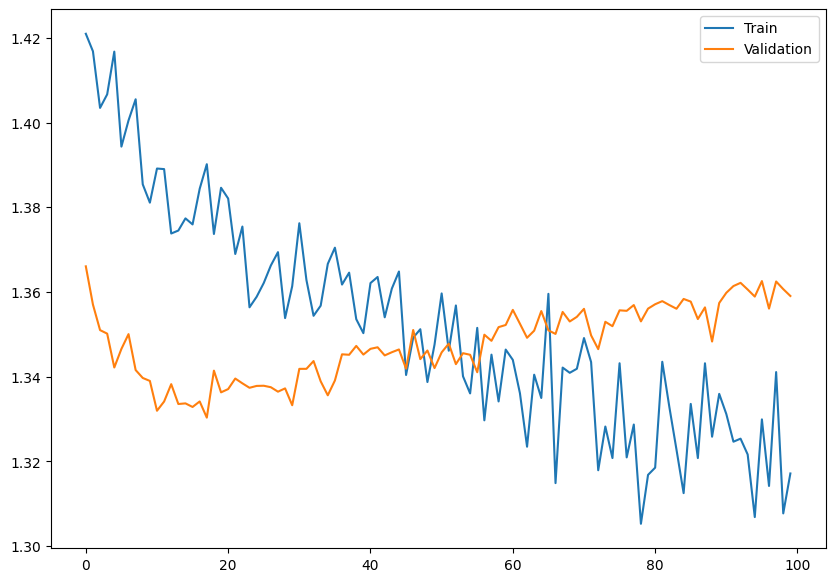

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
file_list_num = np.arange(len(newsubjectname))
file_list_numd = np.arange(len(subjectnamesd))

kf = KFold(n_splits=12)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
modellist = []
modelid = 1
#file_list_num
#for i, (train_index, test_index) in enumerate(kf.split(file_list_num)):
#for train_index in file_list_num:
train_index = file_list_num
#test_index = file_list_numd
test_index_train, test_index_test = train_test_split(file_list_numd, test_size=0.30, random_state=42)
print(f"Fold {i}:")
print(f"  Train: index={train_index}")
#print(f"  Test:  index={test_index}")
net = Net()
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.000001)
epochs = 100
batch_sz = 20
train_loss_epoch = []
val_loss_epoch = []
for epoch in range(epochs):
  train_loss = []
  for tr in train_index:
    v = data_c1d[newsubjectname[tr]]
    l = data_c2[newsubjectname[tr]]
    #print(v[0].shape)
    net.train()
    for i in range(0,len(v),batch_sz):
      #print(v[i].shape)
      #for j in range(0,v[i].shape[0],batch_sz):
      #print(newsubjectname[tr])
      optimizer.zero_grad()
      outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
      #print("Expout {}",outputs.shape)
      #print("Actual {}",l[i:i+batch_sz].shape)
      #print(l[i].shape)
      loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
      loss.backward()
      train_loss.append(loss)
      optimizer.step()
  print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {loss.item()}')
  train_loss_epoch.append(torch.stack(train_loss).mean().cpu().detach().numpy())
  #print(train_loss_epoch)
  batch_sz = 20
  expectedoutputdeap = []
  actualoutputdeap = []

  for tr in test_index_train:
    v = data_de1[subjectnamesd[tr]]
    l = data_del[subjectnamesd[tr]]
    #print(v[0].shape)
    net.train()
    for i in range(0,len(v),batch_sz):
      #print(v[i].shape)
      #for j in range(0,v[i].shape[0],batch_sz):
      #print(newsubjectname[tr])
      optimizer.zero_grad()
      outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
      #print("Expout {}",outputs.shape)
      #print("Actual {}",l[i:i+batch_sz].shape)
      #print(l[i].shape)
      loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
      loss.backward()
      train_loss.append(loss)
      optimizer.step()

  for tr in test_index_test:
      net.eval()
      v = data_de1[subjectnamesd[tr]]
      l = data_del[subjectnamesd[tr]]
      net.eval()
      val_loss = []
      with torch.no_grad():
          for i in range(0,len(v),batch_sz):
            #print(v[i].shape)
            #for j in range(0,v[i].shape[0],batch_sz):
            optimizer.zero_grad()
            outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
            #print(outputs.shape)
            #print(l[i:i+batch_sz].shape)
            loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
            val_loss.append(loss)
            #actualoutputdeap.append(torch.round(outputs.cpu()))
            #expectedoutputdeap.append(l[i:i+batch_sz])
            actualoutputdeap.append(torch.argmax(torch.softmax(outputs.cpu(),dim=1),dim=1))
            expectedoutputdeap.append(torch.argmax(l[i:i+batch_sz],dim=1).numpy())
  val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
  val_loss_epoch.append(val_loss_mean)
  expectedoutputdeap = np.concatenate( expectedoutputdeap, axis=0 )
  actualoutputdeap = np.concatenate( actualoutputdeap, axis=0 )
  #print(expectedoutput.shape)
  #print(actualoutput.shape)
  print(classification_report(expectedoutputdeap,actualoutputdeap))
  print(confusion_matrix(expectedoutputdeap,actualoutputdeap))
  print(f'Validation Loss for {subjectnamesd[tr]} = {val_loss_mean}')
plt.figure(figsize=(10,7))
#print(len(train_loss_epoch))
plt.plot(np.arange(epochs),train_loss_epoch,label='Train')
plt.plot(np.arange(epochs),val_loss_epoch,label='Validation')
plt.legend()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
file_list_num = np.arange(len(newsubjectname))
file_list_numd = np.arange(len(subjectnamesd))

kf = KFold(n_splits=12)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
modellist = []
modelid = 1
#file_list_num
#for i, (train_index, test_index) in enumerate(kf.split(file_list_num)):
#for train_index in file_list_num:
train_index = file_list_numd
test_index_train, test_index_test = train_test_split(file_list_num, test_size=0.30, random_state=42)
#test_index = file_list_num
print(f"Fold {i}:")
print(f"  Train: index={train_index}")
print(f"  Test:  index={test_index_train}")
net = Net()
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.000001)
epochs = 100
batch_sz = 20
train_loss_epoch = []
val_loss_epoch = []
for epoch in range(epochs):
  train_loss = []
  for tr in train_index:
    v = data_de1[subjectnamesd[tr]]
    l = data_del[subjectnamesd[tr]]
    #print(v[0].shape)
    net.train()
    for i in range(0,len(v),batch_sz):
      #print(v[i].shape)
      #for j in range(0,v[i].shape[0],batch_sz):
      #print(newsubjectname[tr])
      optimizer.zero_grad()
      outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
      #print("Expout {}",outputs.shape)
      #print("Actual {}",l[i:i+batch_sz].shape)
      #print(l[i].shape)
      loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
      loss.backward()
      train_loss.append(loss)
      optimizer.step()
  for tr in test_index_train:
    v = data_c1d[newsubjectname[tr]]
    l = data_c2[newsubjectname[tr]]
    #print(v[0].shape)
    net.train()
    for i in range(0,len(v),batch_sz):
      #print(v[i].shape)
      #for j in range(0,v[i].shape[0],batch_sz):
      #print(newsubjectname[tr])
      optimizer.zero_grad()
      outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
      #print("Expout {}",outputs.shape)
      #print("Actual {}",l[i:i+batch_sz].shape)
      #print(l[i].shape)
      loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
      loss.backward()
      train_loss.append(loss)
      optimizer.step()
  print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {loss.item()}')
  train_loss_epoch.append(torch.stack(train_loss).mean().cpu().detach().numpy())
  #print(train_loss_epoch)
  expectedoutputamigos = []
  actualoutputamigos = []

  for tr in test_index_test:
      net.eval()

      v = data_c1d[newsubjectname[tr]]
      l = data_c2[newsubjectname[tr]]
      net.eval()
      val_loss = []
      with torch.no_grad():
          for i in range(0,len(v),batch_sz):
            #print(v[i].shape)
            #for j in range(0,v[i].shape[0],batch_sz):
            optimizer.zero_grad()
            outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
            #print(outputs.shape)
            #print(l[i:i+batch_sz].shape)
            loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
            val_loss.append(loss)
            #actualoutputamigos.append(torch.round(outputs.cpu()))
            #expectedoutputamigos.append(l[i:i+batch_sz])
            actualoutputamigos.append(torch.argmax(torch.softmax(outputs.cpu(),dim=1),dim=1))
            expectedoutputamigos.append(torch.argmax(l[i:i+batch_sz],dim=1).numpy())
  val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
  val_loss_epoch.append(val_loss_mean)
  expectedoutputamigos = np.concatenate( expectedoutputamigos, axis=0 )
  actualoutputamigos = np.concatenate( actualoutputamigos, axis=0 )
  #print(expectedoutput.shape)
  #print(actualoutput.shape)
  print(classification_report(expectedoutputamigos,actualoutputamigos))
  print(confusion_matrix(expectedoutputamigos,actualoutputamigos))
  print(f'Validation Loss for {newsubjectname[tr]} = {val_loss_mean}')
plt.figure(figsize=(10,7))
#print(len(train_loss_epoch))
plt.plot(np.arange(epochs),train_loss_epoch,label='Train')
plt.plot(np.arange(epochs),val_loss_epoch,label='Validation')
plt.legend()

Fold 20:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
  Test:  index=[34  0  4 29 15 19  5 11  1 24  2 33  3 32 23 27 10 22 18 25  6 20  7 14
 28]


/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 1/100, Train Loss: 1.3577150106430054
              precision    recall  f1-score   support

           0       0.21      0.07      0.11        43
           1       0.26      0.28      0.27        61
           2       0.35      0.26      0.30        61
           3       0.24      0.42      0.31        55

    accuracy                           0.27       220
   macro avg       0.27      0.26      0.25       220
weighted avg       0.27      0.27      0.25       220

[[ 3 14  5 21]
 [ 5 17  9 30]
 [ 4 21 16 20]
 [ 2 14 16 23]]
Validation Loss for P40 = 1.4187015295028687


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 2/100, Train Loss: 1.376932978630066
              precision    recall  f1-score   support

           0       0.34      0.49      0.40        43
           1       0.31      0.31      0.31        61
           2       0.33      0.28      0.30        61
           3       0.33      0.27      0.30        55

    accuracy                           0.33       220
   macro avg       0.33      0.34      0.33       220
weighted avg       0.33      0.33      0.32       220

[[21 11  6  5]
 [16 19 10 16]
 [16 18 17 10]
 [ 9 13 18 15]]
Validation Loss for P40 = 1.411934733390808


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 3/100, Train Loss: 1.4020754098892212
              precision    recall  f1-score   support

           0       0.32      0.56      0.41        43
           1       0.30      0.30      0.30        61
           2       0.38      0.28      0.32        61
           3       0.30      0.22      0.25        55

    accuracy                           0.32       220
   macro avg       0.32      0.34      0.32       220
weighted avg       0.33      0.32      0.31       220

[[24 10  5  4]
 [19 18 10 14]
 [18 16 17 10]
 [14 16 13 12]]
Validation Loss for P40 = 1.408593773841858


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 4/100, Train Loss: 1.4329832792282104
              precision    recall  f1-score   support

           0       0.29      0.58      0.39        43
           1       0.28      0.20      0.23        61
           2       0.38      0.33      0.35        61
           3       0.33      0.24      0.27        55

    accuracy                           0.32       220
   macro avg       0.32      0.34      0.31       220
weighted avg       0.32      0.32      0.31       220

[[25  8  5  5]
 [23 12 12 14]
 [21 12 20  8]
 [16 11 15 13]]
Validation Loss for P40 = 1.408947229385376


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 5/100, Train Loss: 1.3117915391921997
              precision    recall  f1-score   support

           0       0.28      0.58      0.38        43
           1       0.27      0.18      0.22        61
           2       0.39      0.34      0.37        61
           3       0.31      0.20      0.24        55

    accuracy                           0.31       220
   macro avg       0.31      0.33      0.30       220
weighted avg       0.31      0.31      0.30       220

[[25  8  5  5]
 [25 11 12 13]
 [22 11 21  7]
 [17 11 16 11]]
Validation Loss for P40 = 1.4100793600082397


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 6/100, Train Loss: 1.4328091144561768
              precision    recall  f1-score   support

           0       0.27      0.56      0.37        43
           1       0.26      0.21      0.23        61
           2       0.46      0.26      0.33        61
           3       0.30      0.25      0.27        55

    accuracy                           0.30       220
   macro avg       0.32      0.32      0.30       220
weighted avg       0.33      0.30      0.30       220

[[24  9  3  7]
 [25 13  7 16]
 [22 13 16 10]
 [17 15  9 14]]
Validation Loss for P40 = 1.3974103927612305


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 7/100, Train Loss: 1.3446555137634277
              precision    recall  f1-score   support

           0       0.28      0.58      0.38        43
           1       0.25      0.21      0.23        61
           2       0.45      0.25      0.32        61
           3       0.29      0.24      0.26        55

    accuracy                           0.30       220
   macro avg       0.32      0.32      0.30       220
weighted avg       0.32      0.30      0.29       220

[[25  8  3  7]
 [25 13  7 16]
 [22 15 15  9]
 [18 16  8 13]]
Validation Loss for P40 = 1.3959490060806274


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 8/100, Train Loss: 1.4171262979507446
              precision    recall  f1-score   support

           0       0.27      0.58      0.37        43
           1       0.27      0.23      0.25        61
           2       0.45      0.25      0.32        61
           3       0.32      0.25      0.28        55

    accuracy                           0.31       220
   macro avg       0.33      0.33      0.31       220
weighted avg       0.33      0.31      0.30       220

[[25  8  3  7]
 [26 14  7 14]
 [22 15 15  9]
 [18 15  8 14]]
Validation Loss for P40 = 1.3976202011108398


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 9/100, Train Loss: 1.4436120986938477
              precision    recall  f1-score   support

           0       0.26      0.56      0.36        43
           1       0.27      0.23      0.25        61
           2       0.46      0.26      0.33        61
           3       0.31      0.24      0.27        55

    accuracy                           0.30       220
   macro avg       0.33      0.32      0.30       220
weighted avg       0.33      0.30      0.30       220

[[24  9  3  7]
 [27 14  7 13]
 [23 13 16  9]
 [18 15  9 13]]
Validation Loss for P40 = 1.3932468891143799


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 10/100, Train Loss: 1.4726126194000244
              precision    recall  f1-score   support

           0       0.26      0.56      0.36        43
           1       0.29      0.26      0.28        61
           2       0.48      0.23      0.31        61
           3       0.33      0.27      0.30        55

    accuracy                           0.31       220
   macro avg       0.34      0.33      0.31       220
weighted avg       0.35      0.31      0.31       220

[[24  9  3  7]
 [26 16  5 14]
 [23 15 14  9]
 [18 15  7 15]]
Validation Loss for P40 = 1.3901711702346802


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 11/100, Train Loss: 1.4617708921432495
              precision    recall  f1-score   support

           0       0.27      0.60      0.37        43
           1       0.31      0.26      0.28        61
           2       0.47      0.23      0.31        61
           3       0.34      0.25      0.29        55

    accuracy                           0.32       220
   macro avg       0.35      0.34      0.31       220
weighted avg       0.35      0.32      0.31       220

[[26  7  3  7]
 [28 16  5 12]
 [25 14 14  8]
 [18 15  8 14]]
Validation Loss for P40 = 1.3884048461914062


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 12/100, Train Loss: 1.3704133033752441
              precision    recall  f1-score   support

           0       0.27      0.60      0.37        43
           1       0.30      0.25      0.27        61
           2       0.45      0.25      0.32        61
           3       0.33      0.24      0.27        55

    accuracy                           0.31       220
   macro avg       0.34      0.33      0.31       220
weighted avg       0.34      0.31      0.30       220

[[26  7  3  7]
 [28 15  6 12]
 [25 13 15  8]
 [18 15  9 13]]
Validation Loss for P40 = 1.3895094394683838


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 13/100, Train Loss: 1.365146517753601
              precision    recall  f1-score   support

           0       0.27      0.58      0.36        43
           1       0.31      0.26      0.29        61
           2       0.47      0.23      0.31        61
           3       0.36      0.29      0.32        55

    accuracy                           0.32       220
   macro avg       0.35      0.34      0.32       220
weighted avg       0.36      0.32      0.32       220

[[25  7  4  7]
 [27 16  5 13]
 [25 13 14  9]
 [17 15  7 16]]
Validation Loss for P40 = 1.3890589475631714


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 14/100, Train Loss: 1.4408514499664307
              precision    recall  f1-score   support

           0       0.27      0.60      0.37        43
           1       0.31      0.23      0.26        61
           2       0.45      0.23      0.30        61
           3       0.35      0.29      0.32        55

    accuracy                           0.32       220
   macro avg       0.34      0.34      0.31       220
weighted avg       0.35      0.32      0.31       220

[[26  5  5  7]
 [28 14  5 14]
 [25 13 14  9]
 [19 13  7 16]]
Validation Loss for P40 = 1.3850816488265991


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 15/100, Train Loss: 1.5525652170181274
              precision    recall  f1-score   support

           0       0.27      0.58      0.37        43
           1       0.31      0.25      0.28        61
           2       0.38      0.25      0.30        61
           3       0.30      0.22      0.25        55

    accuracy                           0.30       220
   macro avg       0.32      0.32      0.30       220
weighted avg       0.32      0.30      0.29       220

[[25  6  5  7]
 [26 15  7 13]
 [25 13 15  8]
 [17 14 12 12]]
Validation Loss for P40 = 1.3872101306915283


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 16/100, Train Loss: 1.491980791091919
              precision    recall  f1-score   support

           0       0.26      0.58      0.36        43
           1       0.32      0.26      0.29        61
           2       0.43      0.20      0.27        61
           3       0.34      0.29      0.31        55

    accuracy                           0.31       220
   macro avg       0.34      0.33      0.31       220
weighted avg       0.34      0.31      0.30       220

[[25  6  5  7]
 [26 16  5 14]
 [25 14 12 10]
 [19 14  6 16]]
Validation Loss for P40 = 1.3854228258132935


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 17/100, Train Loss: 1.5585073232650757
              precision    recall  f1-score   support

           0       0.26      0.56      0.35        43
           1       0.33      0.28      0.30        61
           2       0.42      0.21      0.28        61
           3       0.34      0.27      0.30        55

    accuracy                           0.31       220
   macro avg       0.34      0.33      0.31       220
weighted avg       0.34      0.31      0.31       220

[[24  7  5  7]
 [26 17  5 13]
 [25 14 13  9]
 [18 14  8 15]]
Validation Loss for P40 = 1.3841251134872437


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 18/100, Train Loss: 1.4253458976745605
              precision    recall  f1-score   support

           0       0.26      0.56      0.36        43
           1       0.31      0.26      0.29        61
           2       0.40      0.20      0.26        61
           3       0.36      0.31      0.33        55

    accuracy                           0.31       220
   macro avg       0.33      0.33      0.31       220
weighted avg       0.34      0.31      0.31       220

[[24  7  5  7]
 [26 16  6 13]
 [25 14 12 10]
 [17 14  7 17]]
Validation Loss for P40 = 1.3863104581832886


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 19/100, Train Loss: 1.3247933387756348
              precision    recall  f1-score   support

           0       0.26      0.56      0.35        43
           1       0.28      0.23      0.25        61
           2       0.35      0.20      0.25        61
           3       0.35      0.27      0.31        55

    accuracy                           0.30       220
   macro avg       0.31      0.31      0.29       220
weighted avg       0.31      0.30      0.29       220

[[24  7  6  6]
 [27 14  7 13]
 [25 15 12  9]
 [17 14  9 15]]
Validation Loss for P40 = 1.3816759586334229


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 20/100, Train Loss: 1.3253430128097534
              precision    recall  f1-score   support

           0       0.26      0.56      0.36        43
           1       0.32      0.26      0.29        61
           2       0.39      0.23      0.29        61
           3       0.36      0.27      0.31        55

    accuracy                           0.31       220
   macro avg       0.33      0.33      0.31       220
weighted avg       0.34      0.31      0.31       220

[[24  7  6  6]
 [26 16  7 12]
 [25 13 14  9]
 [17 14  9 15]]
Validation Loss for P40 = 1.3790878057479858


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 21/100, Train Loss: 1.289635181427002
              precision    recall  f1-score   support

           0       0.27      0.58      0.36        43
           1       0.32      0.25      0.28        61
           2       0.44      0.28      0.34        61
           3       0.38      0.27      0.32        55

    accuracy                           0.33       220
   macro avg       0.35      0.34      0.32       220
weighted avg       0.36      0.33      0.32       220

[[25  6  6  6]
 [27 15  7 12]
 [25 12 17  7]
 [17 14  9 15]]
Validation Loss for P40 = 1.383111596107483


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 22/100, Train Loss: 1.3949357271194458
              precision    recall  f1-score   support

           0       0.26      0.56      0.36        43
           1       0.33      0.26      0.29        61
           2       0.45      0.30      0.36        61
           3       0.39      0.29      0.33        55

    accuracy                           0.34       220
   macro avg       0.36      0.35      0.34       220
weighted avg       0.37      0.34      0.33       220

[[24  7  6  6]
 [26 16  7 12]
 [24 12 18  7]
 [17 13  9 16]]
Validation Loss for P40 = 1.3776201009750366


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 23/100, Train Loss: 1.3574507236480713
              precision    recall  f1-score   support

           0       0.27      0.60      0.37        43
           1       0.30      0.20      0.24        61
           2       0.45      0.28      0.34        61
           3       0.36      0.29      0.32        55

    accuracy                           0.32       220
   macro avg       0.34      0.34      0.32       220
weighted avg       0.35      0.32      0.31       220

[[26  5  6  6]
 [30 12  6 13]
 [25 10 17  9]
 [17 13  9 16]]
Validation Loss for P40 = 1.3777981996536255


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 24/100, Train Loss: 1.4168967008590698
              precision    recall  f1-score   support

           0       0.26      0.58      0.36        43
           1       0.30      0.21      0.25        61
           2       0.44      0.26      0.33        61
           3       0.38      0.31      0.34        55

    accuracy                           0.32       220
   macro avg       0.35      0.34      0.32       220
weighted avg       0.35      0.32      0.32       220

[[25  6  6  6]
 [29 13  6 13]
 [25 11 16  9]
 [17 13  8 17]]
Validation Loss for P40 = 1.3765473365783691


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 25/100, Train Loss: 1.450889229774475
              precision    recall  f1-score   support

           0       0.26      0.56      0.36        43
           1       0.28      0.21      0.24        61
           2       0.41      0.26      0.32        61
           3       0.35      0.27      0.31        55

    accuracy                           0.31       220
   macro avg       0.33      0.33      0.31       220
weighted avg       0.33      0.31      0.30       220

[[24  7  6  6]
 [28 13  7 13]
 [24 12 16  9]
 [16 14 10 15]]
Validation Loss for P40 = 1.377549409866333


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 26/100, Train Loss: 1.364749789237976
              precision    recall  f1-score   support

           0       0.26      0.56      0.36        43
           1       0.29      0.23      0.25        61
           2       0.41      0.26      0.32        61
           3       0.38      0.27      0.32        55

    accuracy                           0.31       220
   macro avg       0.33      0.33      0.31       220
weighted avg       0.34      0.31      0.31       220

[[24  7  7  5]
 [28 14  7 12]
 [24 13 16  8]
 [16 15  9 15]]
Validation Loss for P40 = 1.3759098052978516


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 27/100, Train Loss: 1.3228174448013306
              precision    recall  f1-score   support

           0       0.27      0.60      0.37        43
           1       0.28      0.18      0.22        61
           2       0.39      0.25      0.30        61
           3       0.33      0.27      0.30        55

    accuracy                           0.30       220
   macro avg       0.32      0.33      0.30       220
weighted avg       0.32      0.30      0.29       220

[[26  5  7  5]
 [29 11  7 14]
 [25 10 15 11]
 [17 14  9 15]]
Validation Loss for P40 = 1.3694981336593628


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 28/100, Train Loss: 1.3317664861679077
              precision    recall  f1-score   support

           0       0.27      0.58      0.37        43
           1       0.30      0.21      0.25        61
           2       0.41      0.28      0.33        61
           3       0.35      0.27      0.31        55

    accuracy                           0.32       220
   macro avg       0.33      0.34      0.31       220
weighted avg       0.34      0.32      0.31       220

[[25  6  6  6]
 [26 13  8 14]
 [24 12 17  8]
 [17 13 10 15]]
Validation Loss for P40 = 1.3712488412857056


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 29/100, Train Loss: 1.3627420663833618
              precision    recall  f1-score   support

           0       0.27      0.60      0.37        43
           1       0.27      0.18      0.22        61
           2       0.41      0.26      0.32        61
           3       0.35      0.27      0.31        55

    accuracy                           0.31       220
   macro avg       0.32      0.33      0.30       220
weighted avg       0.33      0.31      0.30       220

[[26  5  7  5]
 [29 11  7 14]
 [25 11 16  9]
 [17 14  9 15]]
Validation Loss for P40 = 1.3725799322128296


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 30/100, Train Loss: 1.346318244934082
              precision    recall  f1-score   support

           0       0.27      0.60      0.37        43
           1       0.26      0.16      0.20        61
           2       0.44      0.33      0.38        61
           3       0.36      0.25      0.30        55

    accuracy                           0.32       220
   macro avg       0.33      0.34      0.31       220
weighted avg       0.34      0.32      0.31       220

[[26  5  7  5]
 [29 10  8 14]
 [25 10 20  6]
 [17 14 10 14]]
Validation Loss for P40 = 1.3713691234588623


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 31/100, Train Loss: 1.4610604047775269
              precision    recall  f1-score   support

           0       0.26      0.60      0.37        43
           1       0.24      0.15      0.18        61
           2       0.44      0.30      0.35        61
           3       0.38      0.29      0.33        55

    accuracy                           0.31       220
   macro avg       0.33      0.33      0.31       220
weighted avg       0.33      0.31      0.30       220

[[26  5  7  5]
 [30  9  8 14]
 [26 10 18  7]
 [17 14  8 16]]
Validation Loss for P40 = 1.3704184293746948


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 32/100, Train Loss: 1.3887933492660522
              precision    recall  f1-score   support

           0       0.27      0.60      0.37        43
           1       0.26      0.16      0.20        61
           2       0.44      0.33      0.38        61
           3       0.38      0.27      0.32        55

    accuracy                           0.32       220
   macro avg       0.34      0.34      0.32       220
weighted avg       0.34      0.32      0.31       220

[[26  5  7  5]
 [29 10  8 14]
 [25 11 20  5]
 [18 12 10 15]]
Validation Loss for P40 = 1.3713206052780151


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 33/100, Train Loss: 1.343510627746582
              precision    recall  f1-score   support

           0       0.26      0.58      0.36        43
           1       0.28      0.18      0.22        61
           2       0.43      0.33      0.37        61
           3       0.38      0.27      0.32        55

    accuracy                           0.32       220
   macro avg       0.34      0.34      0.32       220
weighted avg       0.34      0.32      0.31       220

[[25  5  8  5]
 [27 11  9 14]
 [25 11 20  5]
 [18 12 10 15]]
Validation Loss for P40 = 1.3723267316818237


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 34/100, Train Loss: 1.3974851369857788
              precision    recall  f1-score   support

           0       0.26      0.58      0.36        43
           1       0.24      0.15      0.18        61
           2       0.43      0.33      0.37        61
           3       0.38      0.27      0.32        55

    accuracy                           0.31       220
   macro avg       0.33      0.33      0.31       220
weighted avg       0.33      0.31      0.30       220

[[25  5  8  5]
 [29  9  9 14]
 [25 11 20  5]
 [18 12 10 15]]
Validation Loss for P40 = 1.3732337951660156


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 35/100, Train Loss: 1.4157565832138062
              precision    recall  f1-score   support

           0       0.25      0.58      0.35        43
           1       0.26      0.15      0.19        61
           2       0.43      0.31      0.36        61
           3       0.37      0.27      0.31        55

    accuracy                           0.31       220
   macro avg       0.33      0.33      0.30       220
weighted avg       0.33      0.31      0.30       220

[[25  5  8  5]
 [30  9  8 14]
 [27  8 19  7]
 [19 12  9 15]]
Validation Loss for P40 = 1.3723512887954712


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 36/100, Train Loss: 1.3457058668136597
              precision    recall  f1-score   support

           0       0.26      0.58      0.35        43
           1       0.26      0.15      0.19        61
           2       0.42      0.31      0.36        61
           3       0.36      0.27      0.31        55

    accuracy                           0.31       220
   macro avg       0.32      0.33      0.30       220
weighted avg       0.33      0.31      0.30       220

[[25  5  8  5]
 [29  9  8 15]
 [26  9 19  7]
 [18 12 10 15]]
Validation Loss for P40 = 1.3716118335723877


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 37/100, Train Loss: 1.3547197580337524
              precision    recall  f1-score   support

           0       0.25      0.58      0.35        43
           1       0.26      0.15      0.19        61
           2       0.42      0.31      0.36        61
           3       0.36      0.27      0.31        55

    accuracy                           0.31       220
   macro avg       0.32      0.33      0.30       220
weighted avg       0.33      0.31      0.30       220

[[25  5  8  5]
 [29  9  8 15]
 [27  8 19  7]
 [18 12 10 15]]
Validation Loss for P40 = 1.3688300848007202


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 38/100, Train Loss: 1.3679405450820923
              precision    recall  f1-score   support

           0       0.26      0.60      0.36        43
           1       0.27      0.13      0.18        61
           2       0.42      0.31      0.36        61
           3       0.33      0.27      0.30        55

    accuracy                           0.31       220
   macro avg       0.32      0.33      0.30       220
weighted avg       0.33      0.31      0.29       220

[[26  3  8  6]
 [29  8  8 16]
 [27  7 19  8]
 [18 12 10 15]]
Validation Loss for P40 = 1.36531400680542


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 39/100, Train Loss: 1.3019379377365112
              precision    recall  f1-score   support

           0       0.25      0.58      0.35        43
           1       0.27      0.15      0.19        61
           2       0.43      0.31      0.36        61
           3       0.35      0.27      0.31        55

    accuracy                           0.31       220
   macro avg       0.33      0.33      0.30       220
weighted avg       0.33      0.31      0.30       220

[[25  4  8  6]
 [29  9  8 15]
 [28  7 19  7]
 [18 13  9 15]]
Validation Loss for P40 = 1.367820143699646


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 40/100, Train Loss: 1.3155720233917236
              precision    recall  f1-score   support

           0       0.27      0.63      0.38        43
           1       0.29      0.15      0.20        61
           2       0.43      0.31      0.36        61
           3       0.34      0.27      0.30        55

    accuracy                           0.32       220
   macro avg       0.33      0.34      0.31       220
weighted avg       0.34      0.32      0.30       220

[[27  3  7  6]
 [29  9  8 15]
 [27  7 19  8]
 [18 12 10 15]]
Validation Loss for P40 = 1.3656175136566162


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 41/100, Train Loss: 1.4862536191940308
              precision    recall  f1-score   support

           0       0.26      0.60      0.36        43
           1       0.28      0.15      0.19        61
           2       0.45      0.31      0.37        61
           3       0.37      0.31      0.34        55

    accuracy                           0.32       220
   macro avg       0.34      0.34      0.32       220
weighted avg       0.35      0.32      0.31       220

[[26  4  7  6]
 [29  9  8 15]
 [27  7 19  8]
 [18 12  8 17]]
Validation Loss for P40 = 1.364883303642273


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 42/100, Train Loss: 1.4487804174423218
              precision    recall  f1-score   support

           0       0.26      0.60      0.36        43
           1       0.27      0.15      0.19        61
           2       0.45      0.31      0.37        61
           3       0.36      0.29      0.32        55

    accuracy                           0.32       220
   macro avg       0.34      0.34      0.31       220
weighted avg       0.34      0.32      0.31       220

[[26  4  7  6]
 [29  9  8 15]
 [28  7 19  7]
 [18 13  8 16]]
Validation Loss for P40 = 1.3659846782684326


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 43/100, Train Loss: 1.3972772359848022
              precision    recall  f1-score   support

           0       0.26      0.60      0.37        43
           1       0.26      0.15      0.19        61
           2       0.45      0.31      0.37        61
           3       0.36      0.29      0.32        55

    accuracy                           0.32       220
   macro avg       0.33      0.34      0.31       220
weighted avg       0.34      0.32      0.31       220

[[26  4  7  6]
 [29  9  8 15]
 [26  8 19  8]
 [18 13  8 16]]
Validation Loss for P40 = 1.365352988243103


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 44/100, Train Loss: 1.4053857326507568
              precision    recall  f1-score   support

           0       0.26      0.63      0.37        43
           1       0.29      0.15      0.20        61
           2       0.44      0.31      0.37        61
           3       0.36      0.29      0.32        55

    accuracy                           0.32       220
   macro avg       0.34      0.34      0.31       220
weighted avg       0.35      0.32      0.31       220

[[27  3  7  6]
 [29  9  8 15]
 [28  7 19  7]
 [18 12  9 16]]
Validation Loss for P40 = 1.3595128059387207


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 45/100, Train Loss: 1.43271803855896
              precision    recall  f1-score   support

           0       0.26      0.63      0.36        43
           1       0.31      0.15      0.20        61
           2       0.42      0.26      0.32        61
           3       0.35      0.31      0.33        55

    accuracy                           0.31       220
   macro avg       0.34      0.34      0.30       220
weighted avg       0.34      0.31      0.30       220

[[27  3  6  7]
 [30  9  8 14]
 [29  6 16 10]
 [19 11  8 17]]
Validation Loss for P40 = 1.3556184768676758


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 46/100, Train Loss: 1.3850723505020142
              precision    recall  f1-score   support

           0       0.25      0.60      0.36        43
           1       0.26      0.15      0.19        61
           2       0.44      0.30      0.35        61
           3       0.37      0.29      0.33        55

    accuracy                           0.31       220
   macro avg       0.33      0.33      0.31       220
weighted avg       0.34      0.31      0.30       220

[[26  4  7  6]
 [30  9  8 14]
 [28  8 18  7]
 [18 13  8 16]]
Validation Loss for P40 = 1.3566992282867432


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 47/100, Train Loss: 1.2890299558639526
              precision    recall  f1-score   support

           0       0.26      0.63      0.37        43
           1       0.26      0.13      0.17        61
           2       0.41      0.25      0.31        61
           3       0.35      0.31      0.33        55

    accuracy                           0.30       220
   macro avg       0.32      0.33      0.29       220
weighted avg       0.32      0.30      0.29       220

[[27  3  7  6]
 [30  8  8 15]
 [29  7 15 10]
 [18 13  7 17]]
Validation Loss for P40 = 1.3530594110488892


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 48/100, Train Loss: 1.3442063331604004
              precision    recall  f1-score   support

           0       0.26      0.63      0.37        43
           1       0.23      0.11      0.15        61
           2       0.39      0.26      0.31        61
           3       0.35      0.29      0.32        55

    accuracy                           0.30       220
   macro avg       0.31      0.32      0.29       220
weighted avg       0.31      0.30      0.28       220

[[27  3  7  6]
 [30  7  9 15]
 [28  8 16  9]
 [18 12  9 16]]
Validation Loss for P40 = 1.353440284729004


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 49/100, Train Loss: 1.2813643217086792
              precision    recall  f1-score   support

           0       0.26      0.63      0.36        43
           1       0.24      0.11      0.16        61
           2       0.41      0.26      0.32        61
           3       0.36      0.31      0.33        55

    accuracy                           0.30       220
   macro avg       0.32      0.33      0.29       220
weighted avg       0.32      0.30      0.29       220

[[27  3  7  6]
 [30  7  9 15]
 [28  8 16  9]
 [20 11  7 17]]
Validation Loss for P40 = 1.360164999961853


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 50/100, Train Loss: 1.3960257768630981
              precision    recall  f1-score   support

           0       0.25      0.58      0.35        43
           1       0.24      0.13      0.17        61
           2       0.41      0.26      0.32        61
           3       0.36      0.31      0.33        55

    accuracy                           0.30       220
   macro avg       0.32      0.32      0.29       220
weighted avg       0.32      0.30      0.29       220

[[25  4  8  6]
 [30  8  8 15]
 [28  8 16  9]
 [18 13  7 17]]
Validation Loss for P40 = 1.3592885732650757


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 51/100, Train Loss: 1.3857582807540894
              precision    recall  f1-score   support

           0       0.25      0.60      0.36        43
           1       0.25      0.13      0.17        61
           2       0.43      0.26      0.33        61
           3       0.35      0.31      0.33        55

    accuracy                           0.30       220
   macro avg       0.32      0.33      0.30       220
weighted avg       0.33      0.30      0.29       220

[[26  4  6  7]
 [30  8  8 15]
 [28  7 16 10]
 [18 13  7 17]]
Validation Loss for P40 = 1.356626272201538


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 52/100, Train Loss: 1.389414668083191
              precision    recall  f1-score   support

           0       0.25      0.58      0.35        43
           1       0.28      0.16      0.21        61
           2       0.42      0.25      0.31        61
           3       0.36      0.31      0.33        55

    accuracy                           0.30       220
   macro avg       0.33      0.33      0.30       220
weighted avg       0.33      0.30      0.29       220

[[25  5  6  7]
 [29 10  8 14]
 [29  8 15  9]
 [18 13  7 17]]
Validation Loss for P40 = 1.3588141202926636


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 53/100, Train Loss: 1.2856858968734741
              precision    recall  f1-score   support

           0       0.26      0.58      0.36        43
           1       0.26      0.15      0.19        61
           2       0.42      0.26      0.32        61
           3       0.33      0.31      0.32        55

    accuracy                           0.30       220
   macro avg       0.32      0.33      0.30       220
weighted avg       0.32      0.30      0.29       220

[[25  5  7  6]
 [29  9  8 15]
 [25  7 16 13]
 [18 13  7 17]]
Validation Loss for P40 = 1.3567389249801636


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 54/100, Train Loss: 1.3728201389312744
              precision    recall  f1-score   support

           0       0.26      0.63      0.37        43
           1       0.27      0.13      0.18        61
           2       0.42      0.26      0.32        61
           3       0.35      0.31      0.33        55

    accuracy                           0.31       220
   macro avg       0.32      0.33      0.30       220
weighted avg       0.33      0.31      0.29       220

[[27  3  7  6]
 [30  8  8 15]
 [28  6 16 11]
 [18 13  7 17]]
Validation Loss for P40 = 1.3568247556686401


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 55/100, Train Loss: 1.4129823446273804
              precision    recall  f1-score   support

           0       0.26      0.63      0.37        43
           1       0.29      0.15      0.20        61
           2       0.41      0.26      0.32        61
           3       0.36      0.31      0.33        55

    accuracy                           0.31       220
   macro avg       0.33      0.34      0.30       220
weighted avg       0.34      0.31      0.30       220

[[27  3  7  6]
 [30  9  9 13]
 [28  6 16 11]
 [18 13  7 17]]
Validation Loss for P40 = 1.3566771745681763


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 56/100, Train Loss: 1.374547004699707
              precision    recall  f1-score   support

           0       0.26      0.60      0.36        43
           1       0.27      0.15      0.19        61
           2       0.42      0.28      0.34        61
           3       0.36      0.31      0.33        55

    accuracy                           0.31       220
   macro avg       0.33      0.33      0.31       220
weighted avg       0.33      0.31      0.30       220

[[26  4  7  6]
 [30  9  9 13]
 [26  7 17 11]
 [18 13  7 17]]
Validation Loss for P40 = 1.3584575653076172


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 57/100, Train Loss: 1.4244225025177002
              precision    recall  f1-score   support

           0       0.24      0.56      0.34        43
           1       0.26      0.15      0.19        61
           2       0.40      0.26      0.32        61
           3       0.35      0.31      0.33        55

    accuracy                           0.30       220
   macro avg       0.32      0.32      0.29       220
weighted avg       0.32      0.30      0.29       220

[[24  5  8  6]
 [30  9  9 13]
 [26  7 16 12]
 [18 13  7 17]]
Validation Loss for P40 = 1.360120177268982


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 58/100, Train Loss: 1.3907297849655151
              precision    recall  f1-score   support

           0       0.25      0.56      0.35        43
           1       0.28      0.16      0.21        61
           2       0.41      0.28      0.33        61
           3       0.36      0.31      0.33        55

    accuracy                           0.31       220
   macro avg       0.33      0.33      0.30       220
weighted avg       0.33      0.31      0.30       220

[[24  5  8  6]
 [29 10  9 13]
 [26  7 17 11]
 [17 14  7 17]]
Validation Loss for P40 = 1.3589497804641724


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 59/100, Train Loss: 1.4015980958938599
              precision    recall  f1-score   support

           0       0.24      0.53      0.33        43
           1       0.28      0.16      0.21        61
           2       0.41      0.26      0.32        61
           3       0.37      0.33      0.35        55

    accuracy                           0.30       220
   macro avg       0.32      0.32      0.30       220
weighted avg       0.33      0.30      0.30       220

[[23  6  7  7]
 [29 10  9 13]
 [27  7 16 11]
 [17 13  7 18]]
Validation Loss for P40 = 1.3579628467559814


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 60/100, Train Loss: 1.4828804731369019
              precision    recall  f1-score   support

           0       0.25      0.56      0.34        43
           1       0.29      0.16      0.21        61
           2       0.41      0.26      0.32        61
           3       0.37      0.33      0.35        55

    accuracy                           0.31       220
   macro avg       0.33      0.33      0.30       220
weighted avg       0.33      0.31      0.30       220

[[24  5  7  7]
 [29 10  9 13]
 [27  7 16 11]
 [17 13  7 18]]
Validation Loss for P40 = 1.3506550788879395


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 61/100, Train Loss: 1.4110623598098755
              precision    recall  f1-score   support

           0       0.25      0.56      0.35        43
           1       0.29      0.16      0.21        61
           2       0.43      0.30      0.35        61
           3       0.37      0.33      0.35        55

    accuracy                           0.32       220
   macro avg       0.34      0.34      0.31       220
weighted avg       0.34      0.32      0.31       220

[[24  5  7  7]
 [29 10  9 13]
 [25  7 18 11]
 [17 12  8 18]]
Validation Loss for P40 = 1.3539355993270874


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 62/100, Train Loss: 1.32073175907135
              precision    recall  f1-score   support

           0       0.25      0.53      0.34        43
           1       0.26      0.16      0.20        61
           2       0.44      0.30      0.35        61
           3       0.37      0.33      0.35        55

    accuracy                           0.31       220
   macro avg       0.33      0.33      0.31       220
weighted avg       0.34      0.31      0.31       220

[[23  6  7  7]
 [29 10  9 13]
 [23  9 18 11]
 [17 13  7 18]]
Validation Loss for P40 = 1.3563579320907593


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 63/100, Train Loss: 1.4461166858673096
              precision    recall  f1-score   support

           0       0.24      0.51      0.32        43
           1       0.26      0.16      0.20        61
           2       0.41      0.26      0.32        61
           3       0.35      0.31      0.33        55

    accuracy                           0.30       220
   macro avg       0.31      0.31      0.29       220
weighted avg       0.32      0.30      0.29       220

[[22  7  7  7]
 [29 10  8 14]
 [25  9 16 11]
 [17 13  8 17]]
Validation Loss for P40 = 1.3578623533248901


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 64/100, Train Loss: 1.3434969186782837
              precision    recall  f1-score   support

           0       0.24      0.51      0.33        43
           1       0.25      0.16      0.20        61
           2       0.42      0.26      0.32        61
           3       0.36      0.33      0.34        55

    accuracy                           0.30       220
   macro avg       0.32      0.32      0.30       220
weighted avg       0.32      0.30      0.29       220

[[22  7  7  7]
 [29 10  8 14]
 [24 10 16 11]
 [17 13  7 18]]
Validation Loss for P40 = 1.3573757410049438


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 65/100, Train Loss: 1.37890625
              precision    recall  f1-score   support

           0       0.23      0.51      0.32        43
           1       0.26      0.16      0.20        61
           2       0.41      0.25      0.31        61
           3       0.36      0.33      0.34        55

    accuracy                           0.30       220
   macro avg       0.31      0.31      0.29       220
weighted avg       0.32      0.30      0.29       220

[[22  7  7  7]
 [29 10  8 14]
 [26  9 15 11]
 [17 13  7 18]]
Validation Loss for P40 = 1.3571504354476929


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 66/100, Train Loss: 1.290066123008728
              precision    recall  f1-score   support

           0       0.24      0.53      0.33        43
           1       0.26      0.16      0.20        61
           2       0.41      0.25      0.31        61
           3       0.36      0.33      0.34        55

    accuracy                           0.30       220
   macro avg       0.32      0.32      0.30       220
weighted avg       0.32      0.30      0.29       220

[[23  6  7  7]
 [29 10  8 14]
 [26  9 15 11]
 [17 13  7 18]]
Validation Loss for P40 = 1.3541266918182373


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 67/100, Train Loss: 1.407059669494629
              precision    recall  f1-score   support

           0       0.24      0.56      0.34        43
           1       0.29      0.16      0.21        61
           2       0.39      0.25      0.30        61
           3       0.36      0.33      0.34        55

    accuracy                           0.30       220
   macro avg       0.32      0.32      0.30       220
weighted avg       0.33      0.30      0.29       220

[[24  5  7  7]
 [29 10  8 14]
 [28  7 15 11]
 [17 12  8 18]]
Validation Loss for P40 = 1.3546279668807983


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 68/100, Train Loss: 1.3274253606796265
              precision    recall  f1-score   support

           0       0.25      0.56      0.34        43
           1       0.29      0.16      0.21        61
           2       0.41      0.26      0.32        61
           3       0.36      0.33      0.34        55

    accuracy                           0.31       220
   macro avg       0.33      0.33      0.30       220
weighted avg       0.33      0.31      0.30       220

[[24  5  7  7]
 [29 10  8 14]
 [27  7 16 11]
 [17 12  8 18]]
Validation Loss for P40 = 1.3556002378463745


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 69/100, Train Loss: 1.3875612020492554
              precision    recall  f1-score   support

           0       0.24      0.53      0.33        43
           1       0.27      0.16      0.20        61
           2       0.41      0.26      0.32        61
           3       0.35      0.31      0.33        55

    accuracy                           0.30       220
   macro avg       0.32      0.32      0.30       220
weighted avg       0.32      0.30      0.29       220

[[23  6  7  7]
 [29 10  8 14]
 [27  8 16 10]
 [17 13  8 17]]
Validation Loss for P40 = 1.3579564094543457


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 70/100, Train Loss: 1.3685821294784546
              precision    recall  f1-score   support

           0       0.24      0.53      0.33        43
           1       0.26      0.16      0.20        61
           2       0.38      0.25      0.30        61
           3       0.35      0.31      0.33        55

    accuracy                           0.30       220
   macro avg       0.31      0.31      0.29       220
weighted avg       0.32      0.30      0.29       220

[[23  6  8  6]
 [29 10  8 14]
 [26  9 15 11]
 [17 13  8 17]]
Validation Loss for P40 = 1.3608144521713257


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 71/100, Train Loss: 1.4091876745224
              precision    recall  f1-score   support

           0       0.23      0.51      0.32        43
           1       0.26      0.16      0.20        61
           2       0.38      0.25      0.30        61
           3       0.36      0.31      0.33        55

    accuracy                           0.29       220
   macro avg       0.31      0.31      0.29       220
weighted avg       0.31      0.29      0.28       220

[[22  7  9  5]
 [29 10  8 14]
 [26  9 15 11]
 [17 13  8 17]]
Validation Loss for P40 = 1.356858491897583


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 72/100, Train Loss: 1.346399188041687
              precision    recall  f1-score   support

           0       0.24      0.51      0.33        43
           1       0.30      0.20      0.24        61
           2       0.44      0.30      0.35        61
           3       0.37      0.33      0.35        55

    accuracy                           0.32       220
   macro avg       0.34      0.33      0.32       220
weighted avg       0.34      0.32      0.31       220

[[22  7  8  6]
 [27 12  8 14]
 [24  8 18 11]
 [17 13  7 18]]
Validation Loss for P40 = 1.3585398197174072


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 73/100, Train Loss: 1.3190163373947144
              precision    recall  f1-score   support

           0       0.23      0.51      0.32        43
           1       0.27      0.16      0.20        61
           2       0.40      0.26      0.32        61
           3       0.35      0.31      0.33        55

    accuracy                           0.30       220
   macro avg       0.31      0.31      0.29       220
weighted avg       0.32      0.30      0.29       220

[[22  7  7  7]
 [29 10  8 14]
 [26  8 16 11]
 [17 12  9 17]]
Validation Loss for P40 = 1.3614696264266968


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 74/100, Train Loss: 1.3220555782318115
              precision    recall  f1-score   support

           0       0.23      0.51      0.32        43
           1       0.27      0.16      0.20        61
           2       0.42      0.28      0.34        61
           3       0.35      0.31      0.33        55

    accuracy                           0.30       220
   macro avg       0.32      0.32      0.30       220
weighted avg       0.33      0.30      0.29       220

[[22  7  7  7]
 [29 10  7 15]
 [27  8 17  9]
 [17 12  9 17]]
Validation Loss for P40 = 1.3591349124908447


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 75/100, Train Loss: 1.3183058500289917
              precision    recall  f1-score   support

           0       0.24      0.51      0.32        43
           1       0.28      0.18      0.22        61
           2       0.43      0.26      0.33        61
           3       0.35      0.33      0.34        55

    accuracy                           0.30       220
   macro avg       0.33      0.32      0.30       220
weighted avg       0.33      0.30      0.30       220

[[22  7  6  8]
 [28 11  8 14]
 [26  8 16 11]
 [17 13  7 18]]
Validation Loss for P40 = 1.3567306995391846


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 76/100, Train Loss: 1.3883304595947266
              precision    recall  f1-score   support

           0       0.24      0.51      0.32        43
           1       0.28      0.18      0.22        61
           2       0.46      0.30      0.36        61
           3       0.37      0.33      0.35        55

    accuracy                           0.31       220
   macro avg       0.34      0.33      0.31       220
weighted avg       0.34      0.31      0.31       220

[[22  7  6  8]
 [28 11  8 14]
 [26  8 18  9]
 [17 13  7 18]]
Validation Loss for P40 = 1.3559483289718628


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 77/100, Train Loss: 1.3230546712875366
              precision    recall  f1-score   support

           0       0.23      0.49      0.31        43
           1       0.30      0.20      0.24        61
           2       0.39      0.25      0.30        61
           3       0.35      0.33      0.34        55

    accuracy                           0.30       220
   macro avg       0.32      0.31      0.30       220
weighted avg       0.33      0.30      0.30       220

[[21  8  7  7]
 [27 12  8 14]
 [26  8 15 12]
 [17 12  8 18]]
Validation Loss for P40 = 1.3582454919815063


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 78/100, Train Loss: 1.4148764610290527
              precision    recall  f1-score   support

           0       0.23      0.49      0.31        43
           1       0.30      0.20      0.24        61
           2       0.43      0.30      0.35        61
           3       0.36      0.31      0.33        55

    accuracy                           0.31       220
   macro avg       0.33      0.32      0.31       220
weighted avg       0.34      0.31      0.31       220

[[21  8  7  7]
 [27 12  8 14]
 [26  8 18  9]
 [17 12  9 17]]
Validation Loss for P40 = 1.3608901500701904


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 79/100, Train Loss: 1.4231817722320557
              precision    recall  f1-score   support

           0       0.24      0.51      0.32        43
           1       0.26      0.16      0.20        61
           2       0.44      0.28      0.34        61
           3       0.36      0.33      0.34        55

    accuracy                           0.30       220
   macro avg       0.32      0.32      0.30       220
weighted avg       0.33      0.30      0.30       220

[[22  7  7  7]
 [29 10  8 14]
 [25  8 17 11]
 [17 13  7 18]]
Validation Loss for P40 = 1.3572815656661987


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 80/100, Train Loss: 1.3786617517471313
              precision    recall  f1-score   support

           0       0.23      0.49      0.31        43
           1       0.29      0.20      0.24        61
           2       0.42      0.28      0.34        61
           3       0.38      0.33      0.35        55

    accuracy                           0.31       220
   macro avg       0.33      0.32      0.31       220
weighted avg       0.34      0.31      0.31       220

[[21  8  8  6]
 [27 12  8 14]
 [26  8 17 10]
 [17 13  7 18]]
Validation Loss for P40 = 1.3627207279205322


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 81/100, Train Loss: 1.307488203048706
              precision    recall  f1-score   support

           0       0.22      0.44      0.30        43
           1       0.29      0.20      0.23        61
           2       0.40      0.30      0.34        61
           3       0.35      0.31      0.33        55

    accuracy                           0.30       220
   macro avg       0.32      0.31      0.30       220
weighted avg       0.32      0.30      0.30       220

[[19  9  9  6]
 [26 12  9 14]
 [23  9 18 11]
 [17 12  9 17]]
Validation Loss for P40 = 1.3648300170898438


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 82/100, Train Loss: 1.2977218627929688
              precision    recall  f1-score   support

           0       0.24      0.49      0.32        43
           1       0.29      0.18      0.22        61
           2       0.44      0.31      0.37        61
           3       0.36      0.33      0.34        55

    accuracy                           0.31       220
   macro avg       0.33      0.33      0.31       220
weighted avg       0.34      0.31      0.31       220

[[21  7  7  8]
 [27 11  9 14]
 [24  8 19 10]
 [17 12  8 18]]
Validation Loss for P40 = 1.359713077545166


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 83/100, Train Loss: 1.3550732135772705
              precision    recall  f1-score   support

           0       0.24      0.51      0.33        43
           1       0.30      0.18      0.22        61
           2       0.44      0.33      0.38        61
           3       0.34      0.29      0.31        55

    accuracy                           0.31       220
   macro avg       0.33      0.33      0.31       220
weighted avg       0.34      0.31      0.31       220

[[22  6  7  8]
 [27 11  9 14]
 [24  8 20  9]
 [18 12  9 16]]
Validation Loss for P40 = 1.3613938093185425


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 84/100, Train Loss: 1.378252387046814
              precision    recall  f1-score   support

           0       0.24      0.49      0.32        43
           1       0.30      0.18      0.22        61
           2       0.45      0.33      0.38        61
           3       0.36      0.33      0.34        55

    accuracy                           0.32       220
   macro avg       0.34      0.33      0.32       220
weighted avg       0.34      0.32      0.32       220

[[21  6  8  8]
 [27 11  9 14]
 [23  8 20 10]
 [18 12  7 18]]
Validation Loss for P40 = 1.362697720527649


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 85/100, Train Loss: 1.3371638059616089
              precision    recall  f1-score   support

           0       0.24      0.51      0.33        43
           1       0.29      0.20      0.24        61
           2       0.41      0.26      0.32        61
           3       0.35      0.31      0.33        55

    accuracy                           0.30       220
   macro avg       0.32      0.32      0.30       220
weighted avg       0.33      0.30      0.30       220

[[22  7  7  7]
 [27 12  8 14]
 [26  9 16 10]
 [17 13  8 17]]
Validation Loss for P40 = 1.3680768013000488


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 86/100, Train Loss: 1.2910698652267456
              precision    recall  f1-score   support

           0       0.24      0.51      0.33        43
           1       0.30      0.20      0.24        61
           2       0.47      0.33      0.38        61
           3       0.34      0.29      0.31        55

    accuracy                           0.32       220
   macro avg       0.34      0.33      0.32       220
weighted avg       0.35      0.32      0.32       220

[[22  7  6  8]
 [27 12  8 14]
 [24  8 20  9]
 [17 13  9 16]]
Validation Loss for P40 = 1.3657582998275757


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 87/100, Train Loss: 1.3282743692398071
              precision    recall  f1-score   support

           0       0.24      0.49      0.32        43
           1       0.29      0.20      0.24        61
           2       0.50      0.33      0.40        61
           3       0.38      0.35      0.36        55

    accuracy                           0.33       220
   macro avg       0.35      0.34      0.33       220
weighted avg       0.36      0.33      0.33       220

[[21  8  6  8]
 [27 12  8 14]
 [24  8 20  9]
 [17 13  6 19]]
Validation Loss for P40 = 1.3639754056930542


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 88/100, Train Loss: 1.3288655281066895
              precision    recall  f1-score   support

           0       0.24      0.51      0.33        43
           1       0.32      0.20      0.24        61
           2       0.47      0.33      0.38        61
           3       0.39      0.35      0.37        55

    accuracy                           0.33       220
   macro avg       0.35      0.35      0.33       220
weighted avg       0.36      0.33      0.33       220

[[22  6  7  8]
 [27 12  9 13]
 [24  8 20  9]
 [17 12  7 19]]
Validation Loss for P40 = 1.363345980644226


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 89/100, Train Loss: 1.4200085401535034
              precision    recall  f1-score   support

           0       0.23      0.47      0.31        43
           1       0.29      0.20      0.23        61
           2       0.53      0.33      0.40        61
           3       0.37      0.35      0.36        55

    accuracy                           0.32       220
   macro avg       0.35      0.33      0.32       220
weighted avg       0.36      0.32      0.33       220

[[20  9  6  8]
 [27 12  6 16]
 [23  9 20  9]
 [18 12  6 19]]
Validation Loss for P40 = 1.3635610342025757


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 90/100, Train Loss: 1.4287999868392944
              precision    recall  f1-score   support

           0       0.23      0.47      0.31        43
           1       0.29      0.21      0.25        61
           2       0.49      0.30      0.37        61
           3       0.36      0.33      0.34        55

    accuracy                           0.31       220
   macro avg       0.34      0.33      0.32       220
weighted avg       0.35      0.31      0.32       220

[[20  9  6  8]
 [27 13  7 14]
 [23 10 18 10]
 [18 13  6 18]]
Validation Loss for P40 = 1.3686118125915527


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 91/100, Train Loss: 1.2888693809509277
              precision    recall  f1-score   support

           0       0.23      0.49      0.31        43
           1       0.32      0.21      0.25        61
           2       0.45      0.30      0.36        61
           3       0.38      0.33      0.35        55

    accuracy                           0.32       220
   macro avg       0.34      0.33      0.32       220
weighted avg       0.35      0.32      0.32       220

[[21  8  7  7]
 [27 13  8 13]
 [26  8 18  9]
 [18 12  7 18]]
Validation Loss for P40 = 1.3686819076538086


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 92/100, Train Loss: 1.2750962972640991
              precision    recall  f1-score   support

           0       0.24      0.51      0.32        43
           1       0.32      0.21      0.25        61
           2       0.45      0.30      0.36        61
           3       0.37      0.31      0.34        55

    accuracy                           0.32       220
   macro avg       0.34      0.33      0.32       220
weighted avg       0.35      0.32      0.32       220

[[22  7  7  7]
 [27 13  8 13]
 [26  8 18  9]
 [18 13  7 17]]
Validation Loss for P40 = 1.3665995597839355


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 93/100, Train Loss: 1.349128007888794
              precision    recall  f1-score   support

           0       0.23      0.49      0.32        43
           1       0.28      0.20      0.23        61
           2       0.43      0.30      0.35        61
           3       0.36      0.29      0.32        55

    accuracy                           0.30       220
   macro avg       0.32      0.32      0.30       220
weighted avg       0.33      0.30      0.30       220

[[21  8  7  7]
 [27 12  9 13]
 [24 10 18  9]
 [18 13  8 16]]
Validation Loss for P40 = 1.3688373565673828


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 94/100, Train Loss: 1.2098267078399658
              precision    recall  f1-score   support

           0       0.22      0.44      0.29        43
           1       0.27      0.20      0.23        61
           2       0.42      0.30      0.35        61
           3       0.36      0.29      0.32        55

    accuracy                           0.30       220
   macro avg       0.32      0.31      0.30       220
weighted avg       0.32      0.30      0.30       220

[[19 10  7  7]
 [27 12  9 13]
 [24 10 18  9]
 [18 12  9 16]]
Validation Loss for P40 = 1.3708794116973877


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 95/100, Train Loss: 1.3937057256698608
              precision    recall  f1-score   support

           0       0.23      0.49      0.31        43
           1       0.30      0.20      0.24        61
           2       0.41      0.30      0.34        61
           3       0.34      0.27      0.30        55

    accuracy                           0.30       220
   macro avg       0.32      0.31      0.30       220
weighted avg       0.33      0.30      0.30       220

[[21  8  7  7]
 [27 12  9 13]
 [26  8 18  9]
 [18 12 10 15]]
Validation Loss for P40 = 1.3689371347427368


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 96/100, Train Loss: 1.3537944555282593
              precision    recall  f1-score   support

           0       0.24      0.51      0.32        43
           1       0.29      0.18      0.22        61
           2       0.40      0.30      0.34        61
           3       0.34      0.27      0.30        55

    accuracy                           0.30       220
   macro avg       0.32      0.31      0.30       220
weighted avg       0.32      0.30      0.29       220

[[22  7  8  6]
 [27 11  9 14]
 [26  8 18  9]
 [18 12 10 15]]
Validation Loss for P40 = 1.3719031810760498


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 97/100, Train Loss: 1.381346583366394
              precision    recall  f1-score   support

           0       0.22      0.47      0.30        43
           1       0.26      0.16      0.20        61
           2       0.42      0.31      0.36        61
           3       0.35      0.29      0.32        55

    accuracy                           0.30       220
   macro avg       0.31      0.31      0.29       220
weighted avg       0.32      0.30      0.29       220

[[20  9  7  7]
 [27 10 10 14]
 [25  8 19  9]
 [18 12  9 16]]
Validation Loss for P40 = 1.3717149496078491


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 98/100, Train Loss: 1.3547544479370117
              precision    recall  f1-score   support

           0       0.23      0.49      0.31        43
           1       0.32      0.20      0.24        61
           2       0.41      0.31      0.36        61
           3       0.36      0.29      0.32        55

    accuracy                           0.31       220
   macro avg       0.33      0.32      0.31       220
weighted avg       0.34      0.31      0.31       220

[[21  6  9  7]
 [27 12  9 13]
 [25  8 19  9]
 [18 12  9 16]]
Validation Loss for P40 = 1.3695673942565918


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 99/100, Train Loss: 1.3498438596725464
              precision    recall  f1-score   support

           0       0.23      0.42      0.29        43
           1       0.26      0.18      0.21        61
           2       0.45      0.34      0.39        61
           3       0.35      0.33      0.34        55

    accuracy                           0.31       220
   macro avg       0.32      0.32      0.31       220
weighted avg       0.33      0.31      0.31       220

[[18  9  9  7]
 [24 11  9 17]
 [21 10 21  9]
 [17 12  8 18]]
Validation Loss for P40 = 1.3638173341751099


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_96/2974510044.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_96/2974510044.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

Epoch 100/100, Train Loss: 1.351833462715149
              precision    recall  f1-score   support

           0       0.24      0.49      0.32        43
           1       0.30      0.18      0.22        61
           2       0.44      0.33      0.38        61
           3       0.35      0.33      0.34        55

    accuracy                           0.32       220
   macro avg       0.33      0.33      0.32       220
weighted avg       0.34      0.32      0.31       220

[[21  6  9  7]
 [25 11  8 17]
 [24  8 20  9]
 [17 12  8 18]]
Validation Loss for P40 = 1.3638700246810913


/tmp/ipykernel_96/2974510044.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
